# Introduction to Object Detection

Object detection is the task of detecting instances of objects of a certain class within an image. The state-of-the-art methods can be categorized into two main types: one-stage methods and two stage-methods. One-stage methods prioritize inference speed, and example models include YOLO, SSD and RetinaNet. Two-stage methods prioritize detection accuracy, and example models include Faster R-CNN, Mask R-CNN and Cascade R-CNN.

## Introduction to YOLO (You Only Look Once  👀)

**Sample photo of this project.**
![](https://drive.google.com/uc?export=view&id=1U0Q03g87HkmD5e9PeATPbl-0q4S3eirJ)

**How does YOLO work?** 🤔

Source: [Dagshub](https://dagshub.com/blog/yolov6/)

YOLO suggested a different methodology where both stages are conducted in the same neural network. First, the image is divided into cells, each having an equal dimensional region of SxS. Then, each cell detects and locates the objects it contains with bounding box coordinates (relative to its coordinates) with the object label and probability of the thing being present in the cell.
![](https://drive.google.com/uc?export=view&id=1Aq3uxv_uT_lbBGb5STvtfWkR-5QoSSO4)


**Drink detector by using YOLOv5** 🧃

YOLOv5 🚀 is a family of object detection architectures and models pretrained on the COCO dataset, and represents Ultralytics open-source research into future vision AI methods, incorporating lessons learned and best practices evolved over thousands of hours of research and development. [GitHub Source](https://github.com/ultralytics/yolov5)
![](https://drive.google.com/uc?export=view&id=1MCaNHYzSmgT_9PxWgUa19MWdBG0_mGpY)

**Why YOLOv5** 🧃

YOLOv5 is fast and easy to use. It is based on the PyTorch framework, which has a larger community than Yolo v4 Darknet. The installation is simple and straightforward. Unlike YOLOv4, you don’t have to struggle to build it from the source, not even with CUDA support. You can choose from ten available multi-scale models having speed/accuracy tradeoffs.Due to the advantages of Python-based core, it can be easily implemented in EDGE devices. iDetect is an iOS app owned by Ultralytics, the company that developed YOLOv5. It can perform real-time object detection on phones using YOLOv5. ![](https://drive.google.com/uc?export=view&id=1mPr1_PO9sw_SMHlk9hQEnzT9fAbPsjTp)

## Workflow

1. Data Preparation and Augmentation by using Roboflow.
2. Setting up Google Colab environment and import data from Roboflow by using API
3. Training the data by using 2 separate models and visualizing
  - Training from scratch
  - Using Transfer Learning
4. Predict test dataset and save the model for further use

I would provide additional information in each task below and refer to it for future research.



## Setting Up environment

In [ ]:
# Clone YOLOv5 from Github
!git clone https://github.com/ultralytics/yolov5

# Install requirements and import libraries
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

Cloning into 'yolov5'...
remote: Enumerating objects: 13162, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 13162 (delta 23), reused 26 (delta 13), pack-reused 13119
Receiving objects: 100% (13162/13162), 12.48 MiB | 31.48 MiB/s, done.
Resolving deltas: 100% (9037/9037), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 8.0 MB/s 
     |████████████████████████████████| 21.6 MB 1.3 MB/s 
     |████████████████████████████████| 145 kB 70.0 MB/s 
     |████████████████████████████████| 67 kB 7.6 MB/s 
     |████████████████████████████████| 178 kB 63.3 MB/s 
     |████████████████████████████████| 4.3 MB 43.6 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 138 kB 64.9 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
ERROR: pip's dependency resolver does not currently take into acco

### Checking PyTorch and GPU

In [ ]:
import torch
import os
import utils
display = utils.notebook_init()

YOLOv5 🚀 v6.1-325-g3e85863 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/166.8 GB disk)


### Set environments of dataset directory

In [ ]:
os.environ["DATSET_DIRECTORY"] = "/content/datasets"

# Preparing the data with Roboflow 🤖
[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily organize, label, and prepare a high-quality dataset with your own custom data. It's friendly and free for public users. It is also recommend to add up 10% background images, to reduce false-positive errors.

Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building with `roboflow` pip package.
* Custom training example: https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/?ref=ultralytics

Import data that we have labelled from website Roboflow by using `api_key` from Roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="hdZWYhhJWTLByNJrsXeQ")
project = rf.workspace("north-patawee").project("drinkdetector")
dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to drinkDetector-3 in yolov5pytorch:: 100%|██████████| 1018/1018 [00:01<00:00, 989.70it/s]


## Data Preparation 🎇

The most challaenging part of this project is data collection and labeling each photo because I need to take a photo and lebel after one by one so it takes a lot of time to prepare a suitable object for this project.

1. Created the drinks data for 209 photos from my mobile phones on a white background and separated them into 149 training, 31 validation, and 31 test photos.
2. Improve the quality of the model detections by increasing the number of photos from different angles and positions. The accuracy could be improved by increasing the number of images to meet the recommendation of the libraries.
3. Using Roboflow to label the data manually, photo by photo. Furthermore, Roboflow provide data augmentation to generate more photo by using image augmentation technique such as 
  * Rotate 90 clockwise and anti-clockwise.
  * Increase the noise of the photo.

**Photo without label**
![](https://drive.google.com/uc?export=view&id=1DEsEgq0_Ey2W7c7DoT-HQEJ2BHFhLA_H)

**Photo with label**
![](https://drive.google.com/uc?export=view&id=1XiSNnAI7WMn31wKOa1nj7938dQnXp3Mx)


After image augmentation to generate more photos to train, I finally have 441 images to train.

Here's the option provided by the Roboflow.
![](https://drive.google.com/uc?export=view&id=1L5HjHflEkLhKUAEK75wk4wdHO553-mxr)

### Visualize the data that we use to train 
Our training data contains a different original and augmented image directly using the augmentation function on the Roboflow website. This dataset contains.
* 90% Rotate: Clockwise, Counter-Clockwise
* Noise: Up to 5% of pixels

Image name: opencv_frame_81_png.rf.5725da65ab2975c75fc974b2c80171dc.jpg


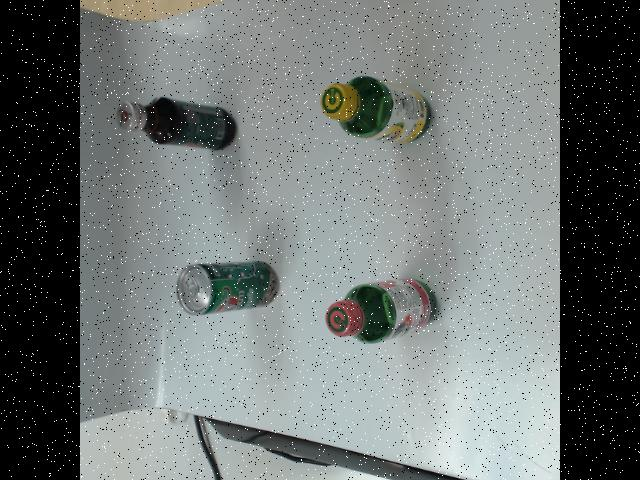

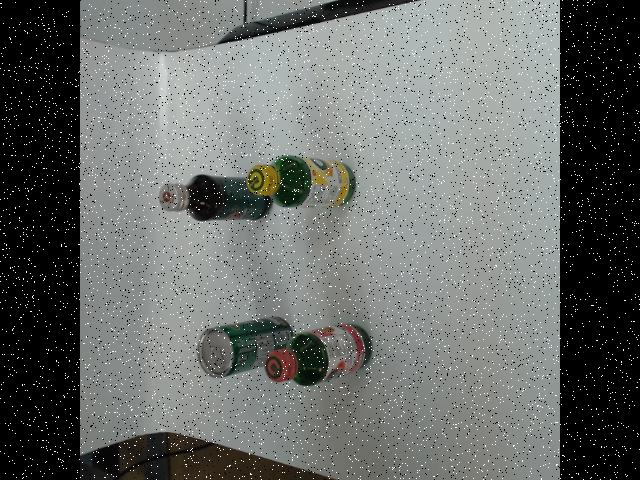



Image name: opencv_frame_11_png.rf.98e6bb39abf2d45e3d462a25a45731c2.jpg


Image name: opencv_frame_69_png.rf.0aacda51795539763cabe729261cb8ab.jpg


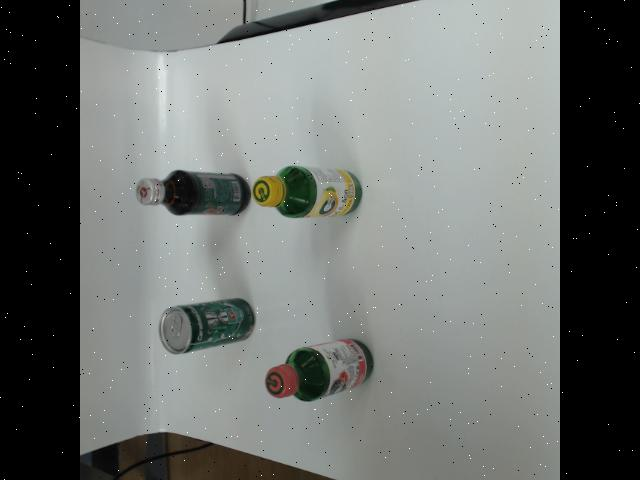



Image name: opencv_frame_48_png.rf.4f6ebf5c251c4b1139266112a147fde9.jpg


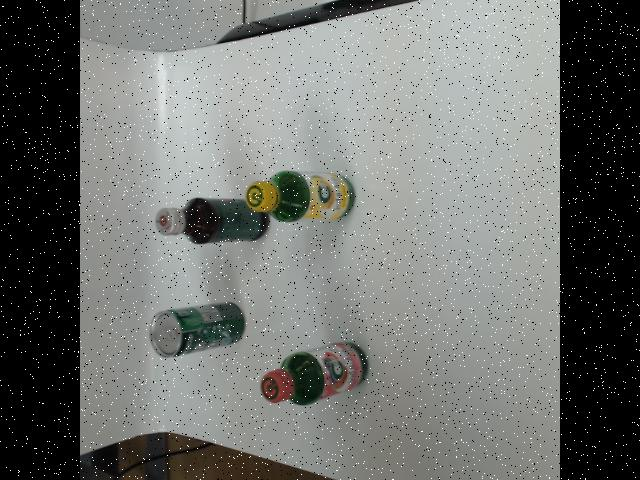



Image name: opencv_frame_75_png.rf.d4538bc86770c4bc49f51b52a6be456a.jpg


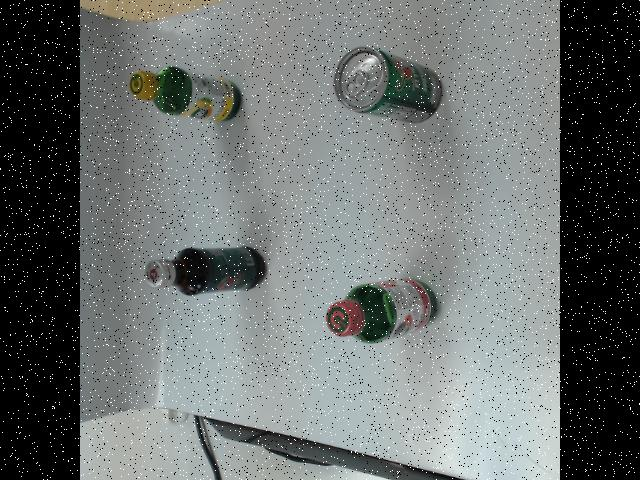



Image name: opencv_frame_19_png.rf.858f5f766071d7eb1301d0cc3b49e8f1.jpg


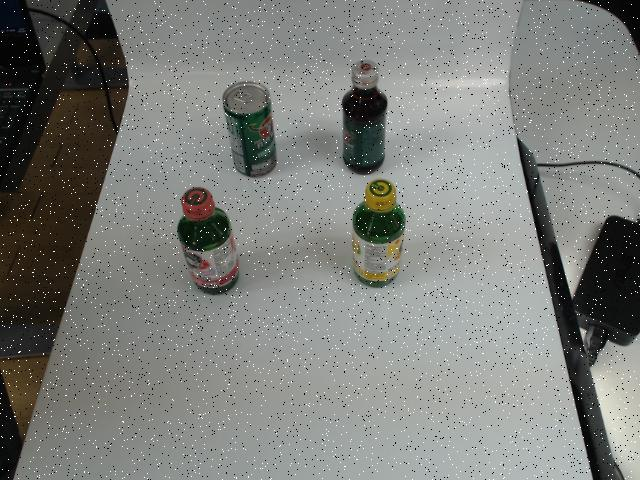



Image name: opencv_frame_47_png.rf.7e21579cfc8bba7e72bdeb8f70df3749.jpg


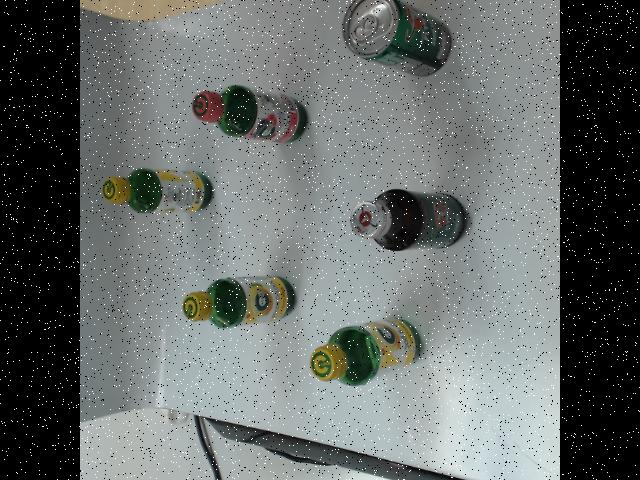



Image name: opencv_frame_61_png.rf.60f50ea6108b26356b920cdc73dbd038.jpg


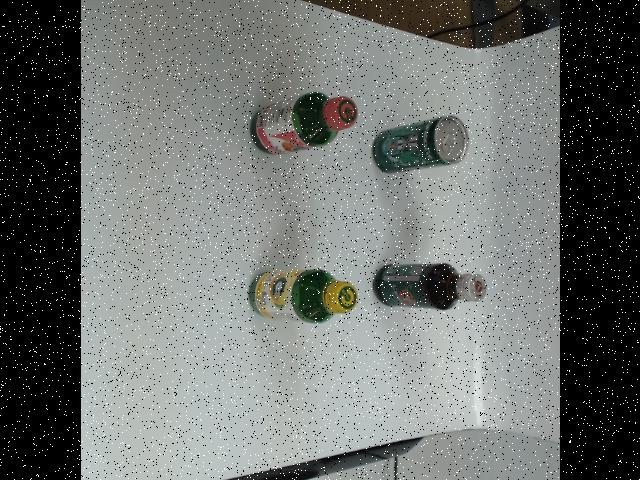



Image name: opencv_frame_48_png.rf.c7ac64fb3540ad3b614a378d20c86b15.jpg


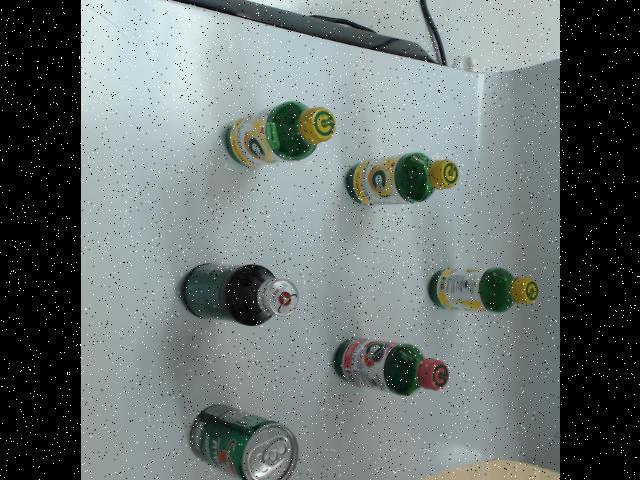

In [ ]:
import glob
from IPython.display import Image, display
import random

# Display the image from our train folder for 10 photos
i=0
while i<10:
  photo = random.choice(glob.glob('/content/yolov5/drinkDetector-3/train/images/*.jpg'))  # jpeg
  i += 1
  
  if i < 10:
    print(f"Image name: {photo.replace('/content/yolov5/drinkDetector-3/train/images/', '')}")
    display(Image(filename=photo))
    print("\n")

# Building the model with YOLOv5 from scratch 🏋🏻‍♀️
When having a large enough dataset, the model will benefit most by training from scratch. The weights are randomly initialized by passing an empty string to the weights argument.

**Training**

For the simplicity of this tutorial, we will train the small parameters size model YOLOv5s, though bigger models can be used for improved results. Different training approaches might be considered for different situations, and here we will cover the most commonly used techniques.

![](https://drive.google.com/uc?export=view&id=1JR0bAQj803NPxJAlN3CN_MDloFeoqu5G)

## Model 1: Training Data From Scratch

We could train the data by only specifying hyperparameters that we want, such as
* --img = Image size of the input
* --batch = Number of samples to work through before updating the internal model parameters.
* --epochs =  Training the neural network with all the training data for one cycle
* --data = Path to the model-configurations file
> data.yaml describes the dataset parameters.
* --weights = Deep learning format that we want to use, which is `yolov5s` in this model.

[Source code for train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)

In [ ]:
!python train.py --img 416 --batch 32 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --name 'training_scratch' --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/drinkDetector-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=training_scratch, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.1-325-g3e85863 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, ob

## Display the results
To better understand the result, let's summarize YOLOv5 losses and metrics YOLO loss function is composed of three parts.
1. box_loss: bounding box regression loss or Mean Squared Error
2. obj_loss: the confidence of object presence in the objectness loss (Binary Cross Entropy)
3. cls_loss: the classification loss

**Important metrics**
* mAP = Mean Average Precision ( 'mAP_0.5:0.95' is the average mAP over different IOU thresholds.
* IoU = Intersection over Union

To read more, please check here: [Paperspaceblog](https://blog.paperspace.com/mean-average-precision/)

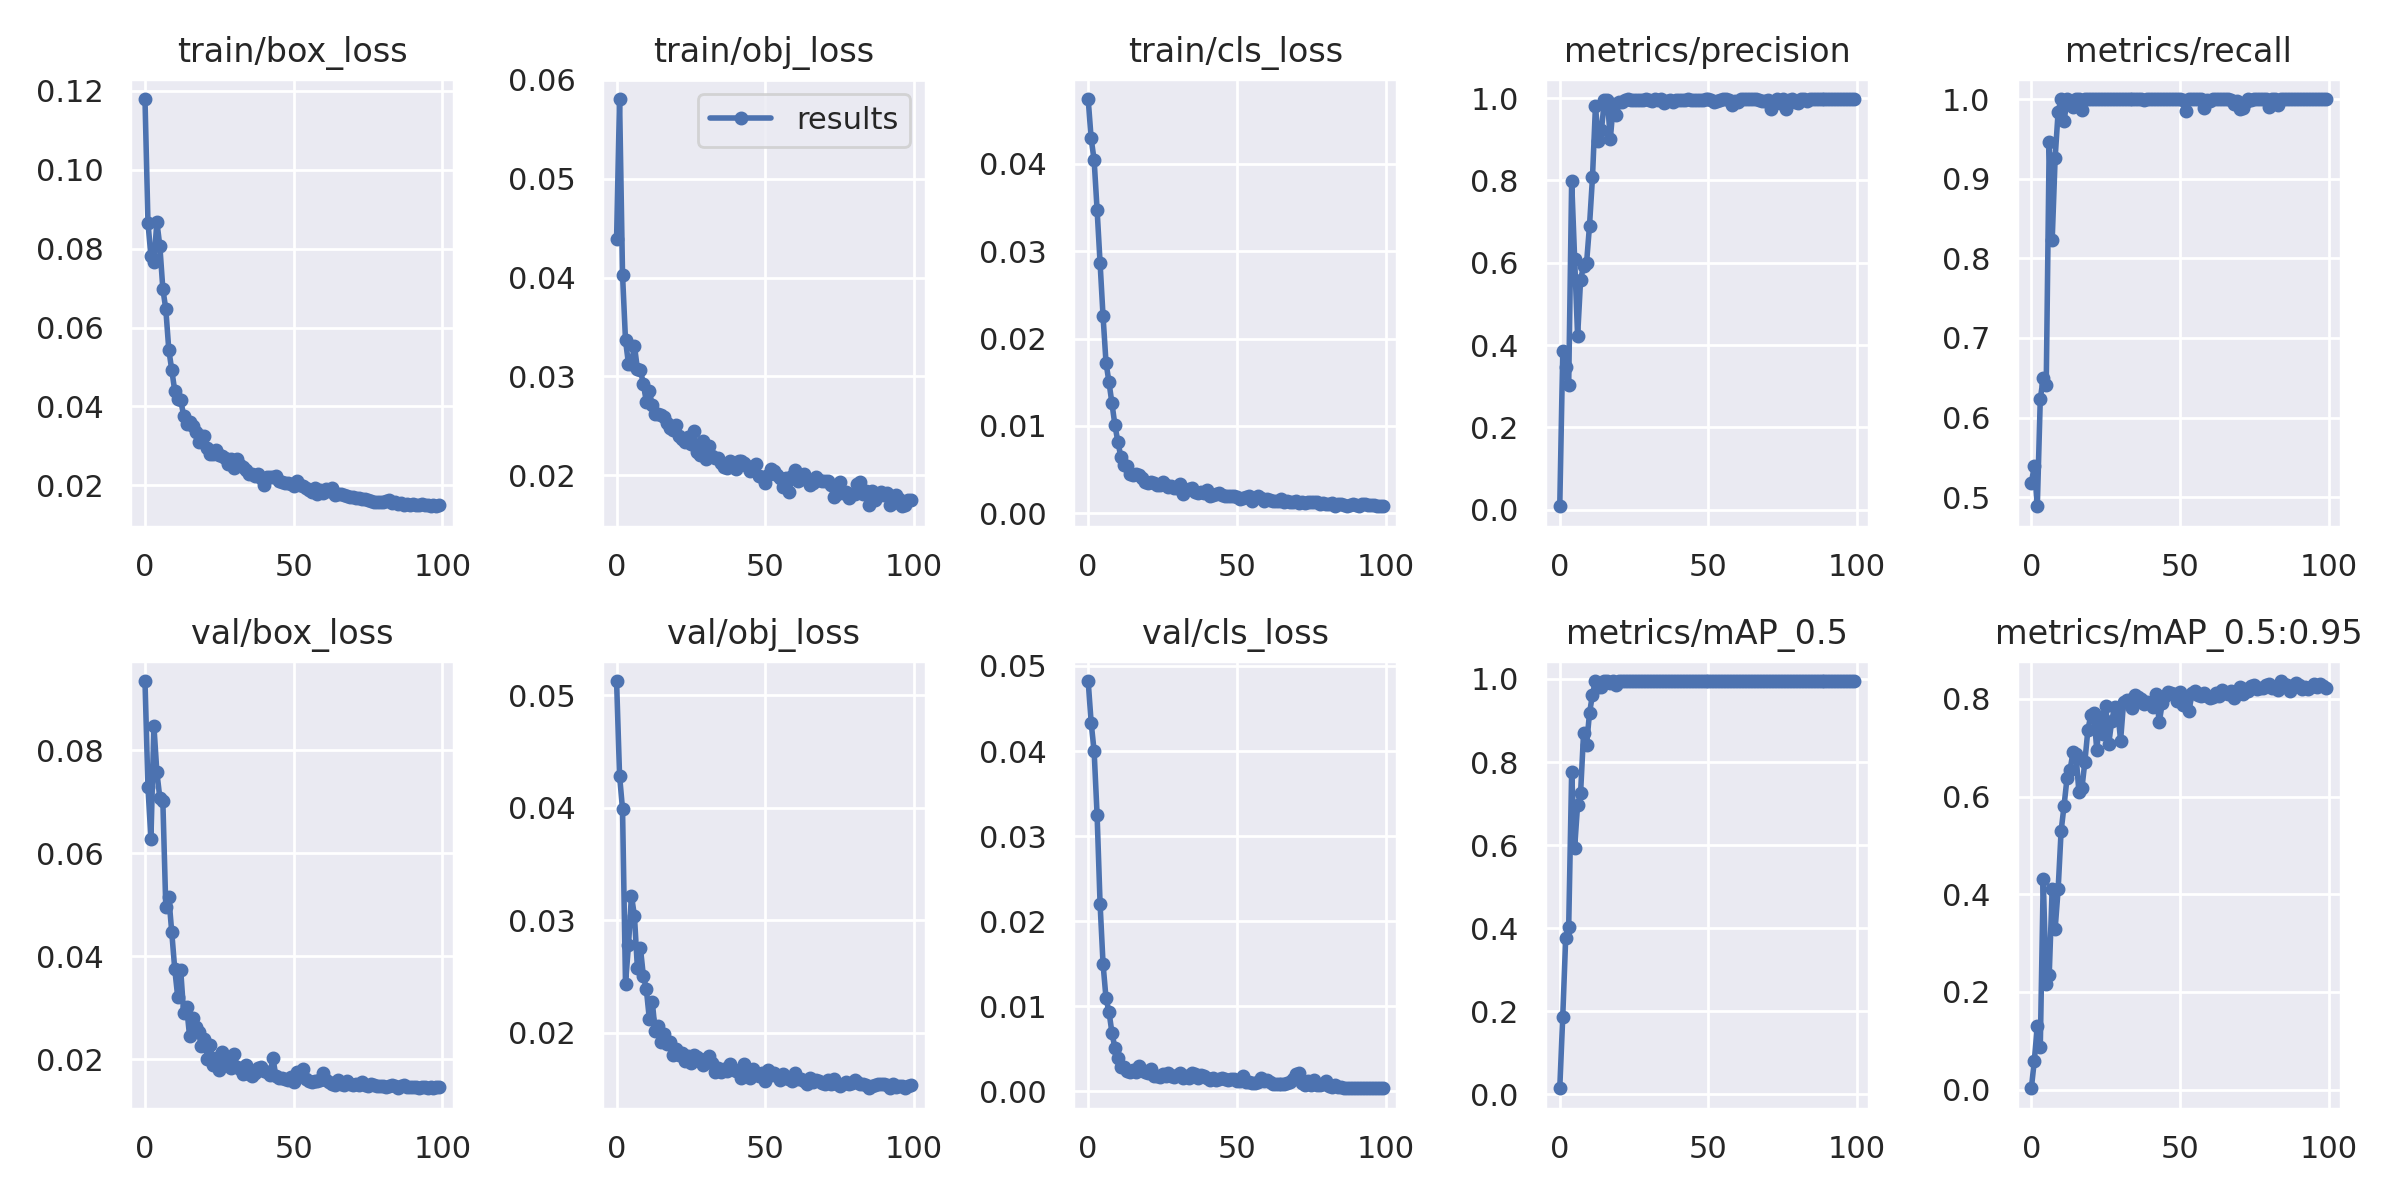

In [ ]:
display(Image(f"/content/yolov5/runs/train/training_scratch/results.png"))

# Visualyzing Model 1 results 🤯
After training the data, we could visualize our model's results to see the accuracy and other metrics.

## On training results
One of the best ways, when we are using the Deep Learning technique, is to visualize by using Tensorboard to get to know everything more accessible by using an interactive graph.

In [ ]:
# Loading the tensorboard
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

### Confusion matrix
When we try to classify things, a confusion matrix is a table that defines a classification algorithm's performance.

From the visualizes below, we could say that our model works almost perfectly because it predicts almost a perfect score of more than 90%.

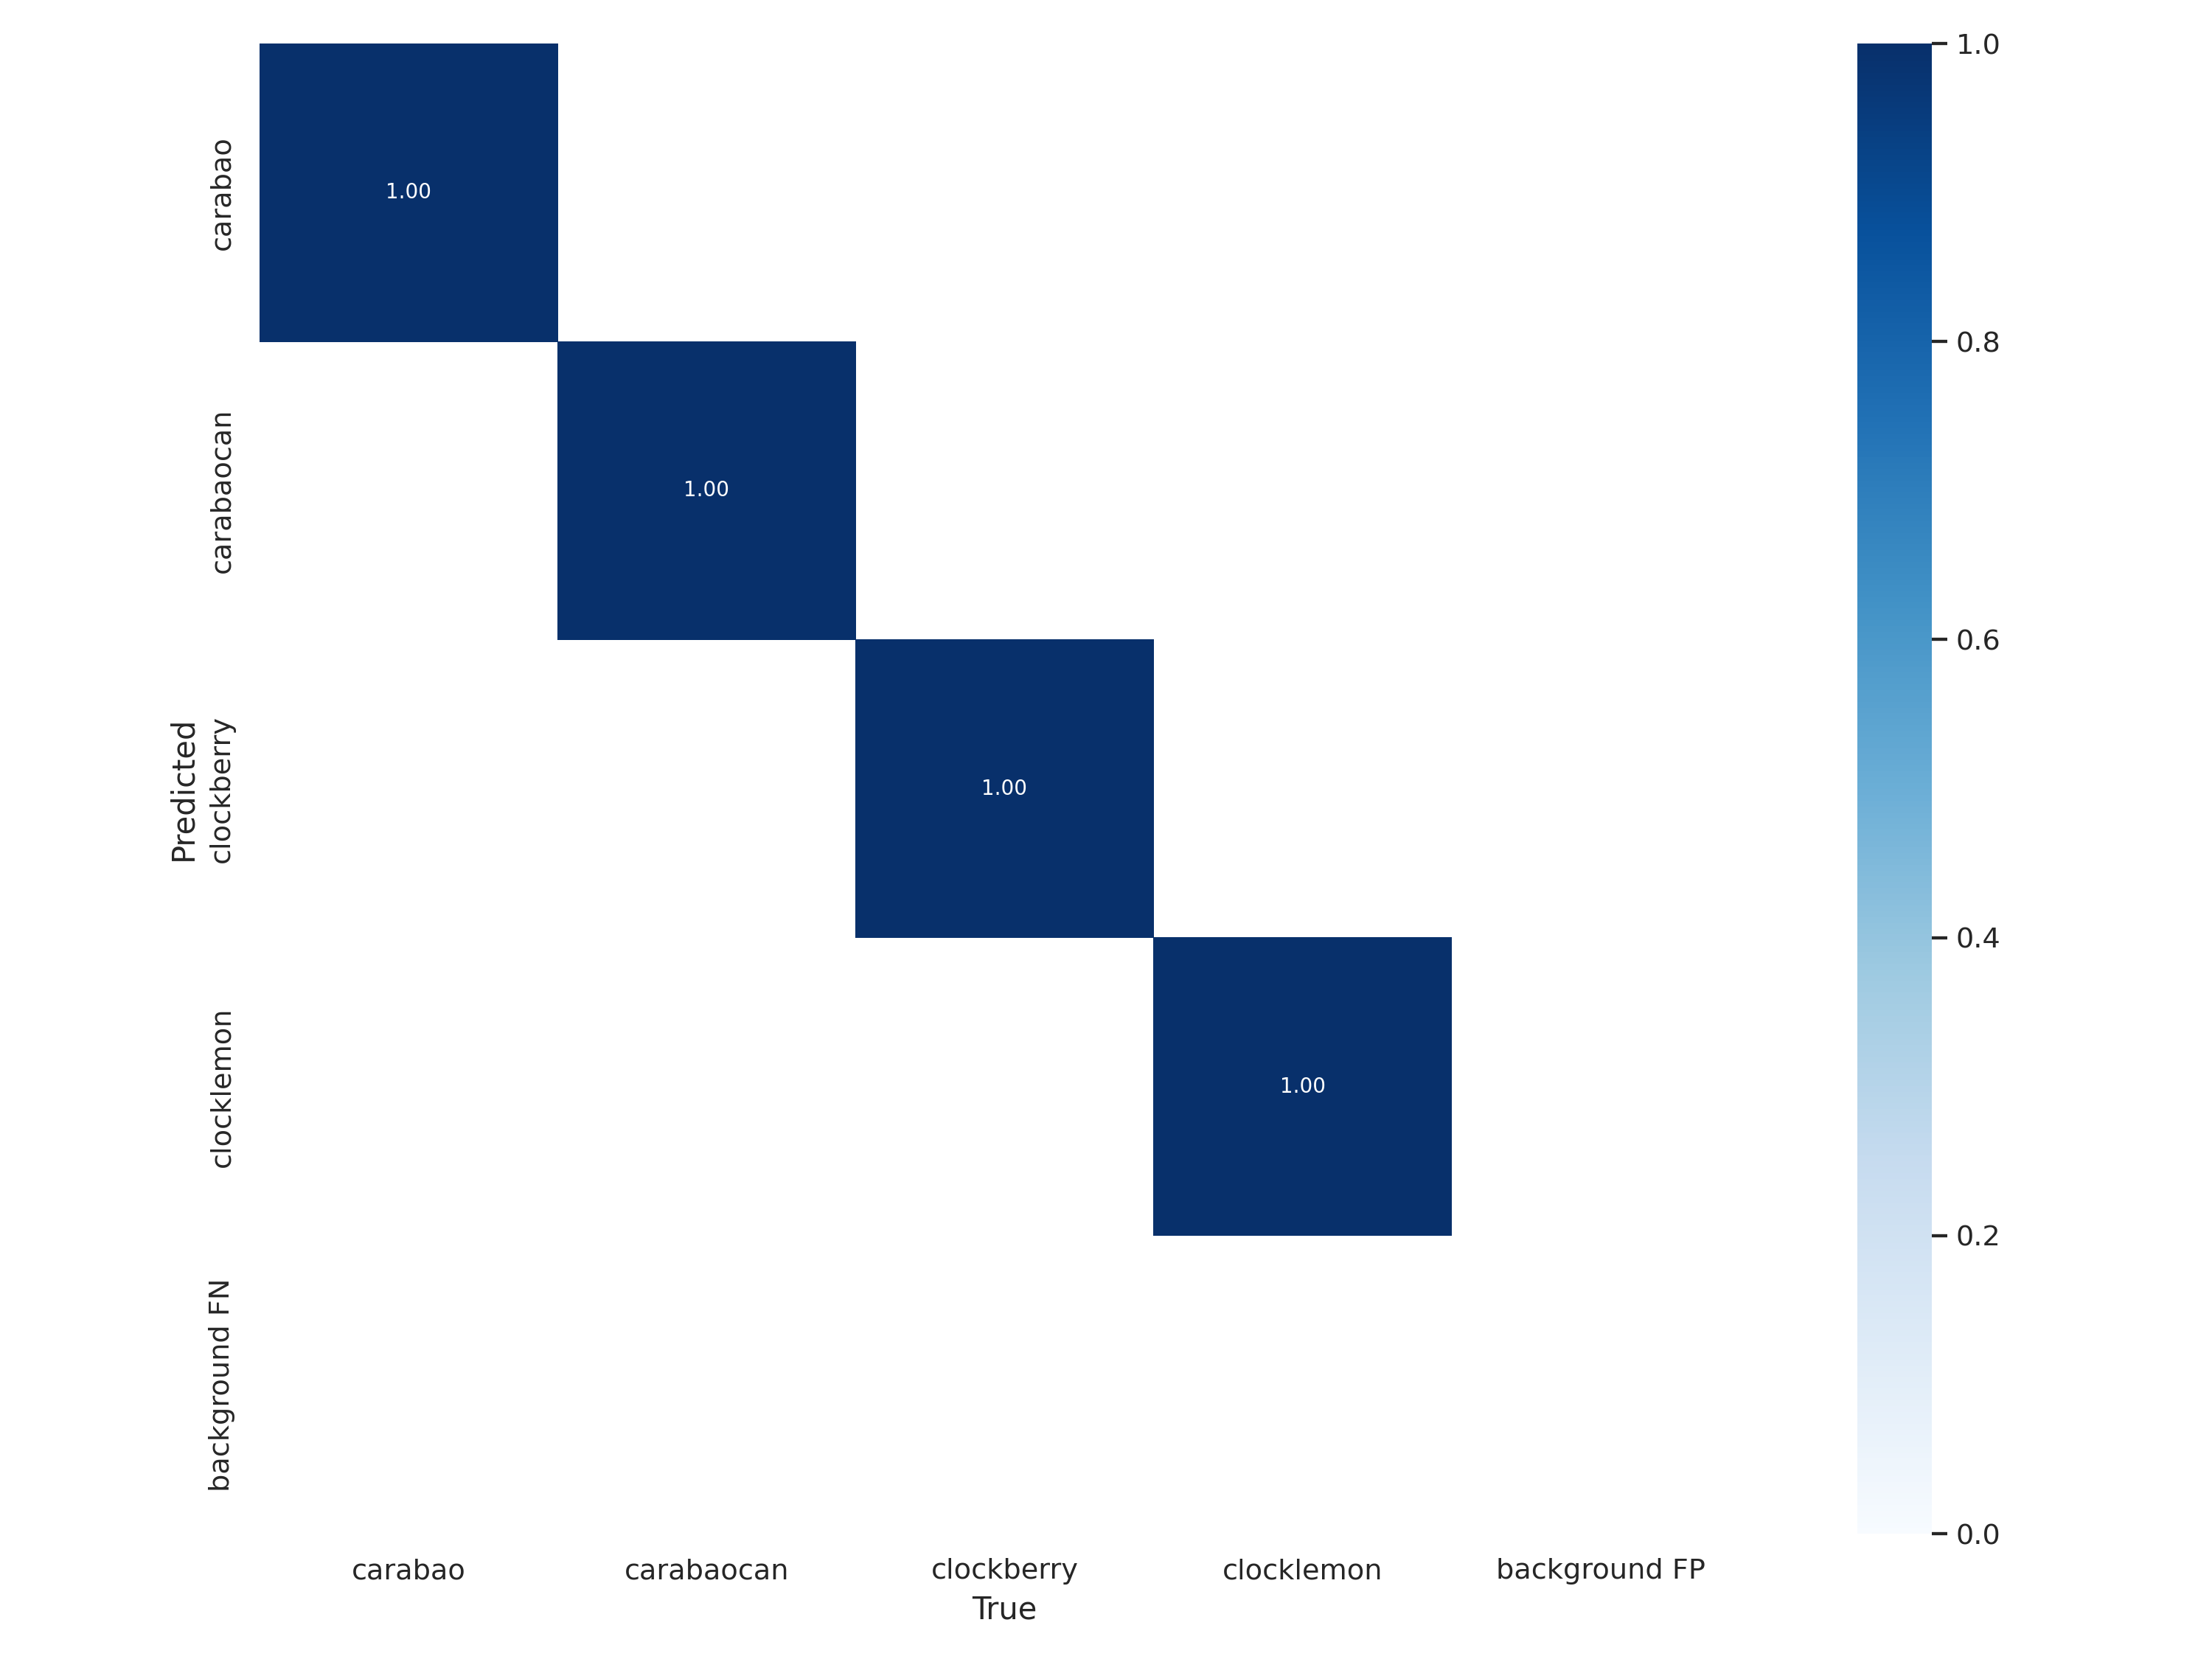

In [ ]:
# Display Confusion Matrix
Image('/content/yolov5/runs/train/training_scratch/confusion_matrix.png', width=1000)

### Precision
Precision is a metric that quantifies the number of correct positive predictions made.

> $Precision= TruePositive/(TruePositve+FalsePositive)$




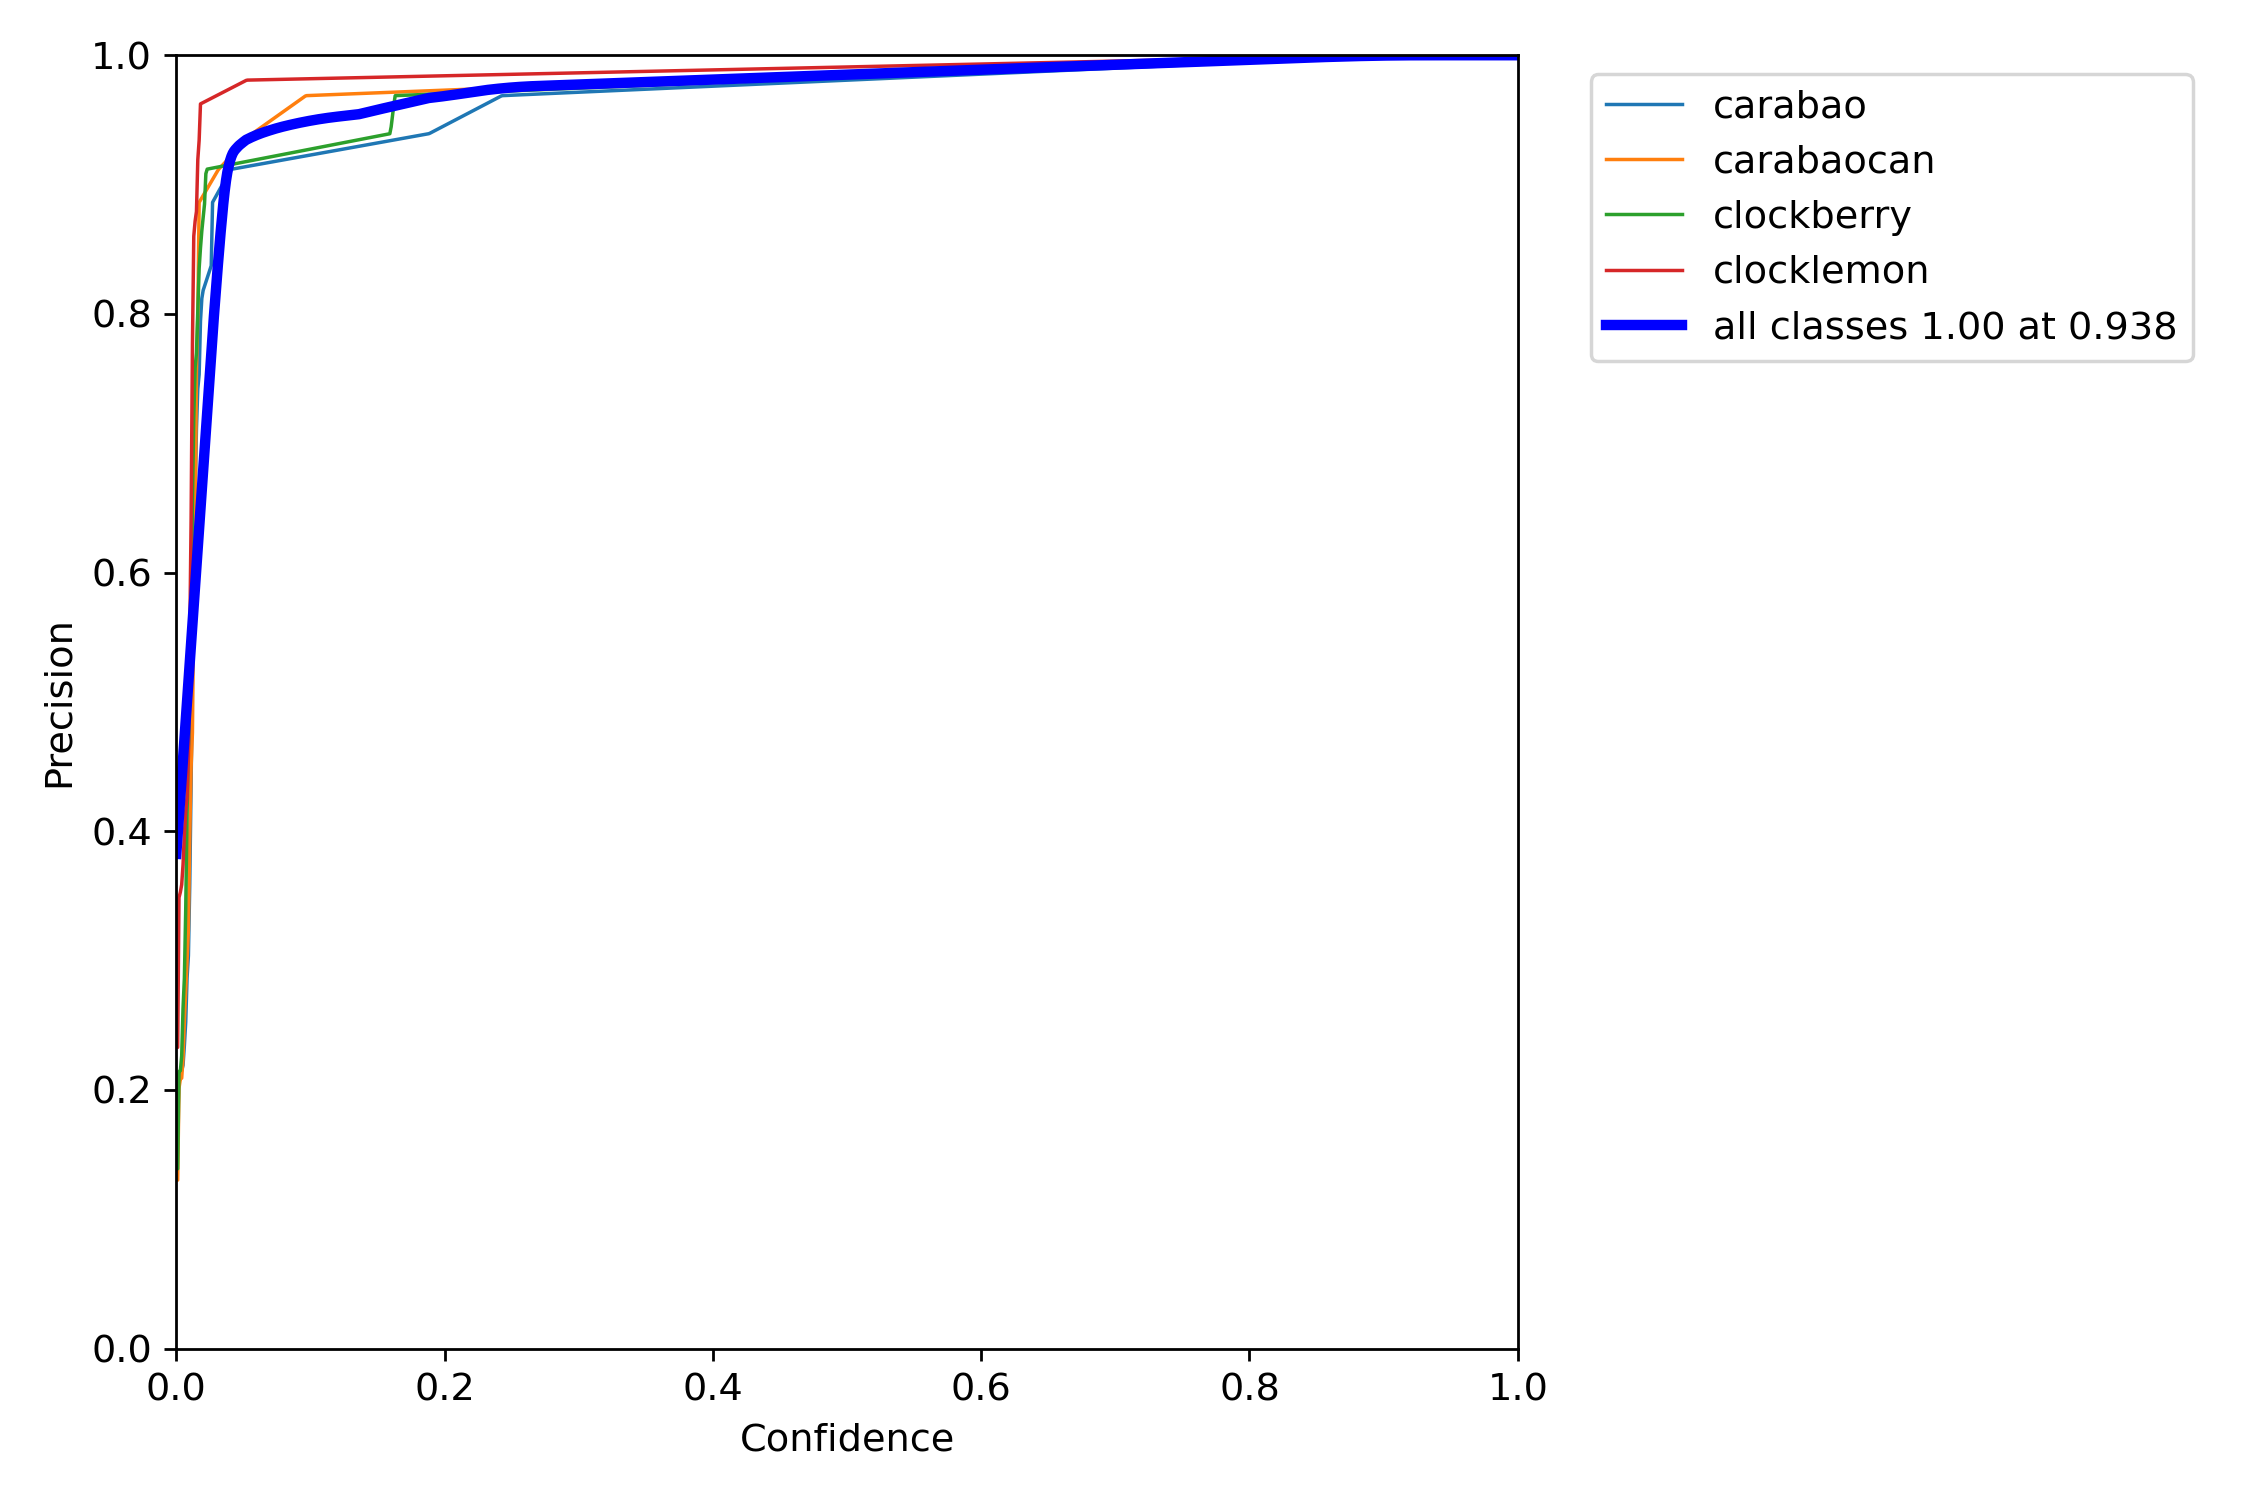

In [ ]:
# Display Precision
Image('/content/yolov5/runs/train/training_scratch/P_curve.png', width=1000)

### Recall
Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

> $Recall = TruePositive/(TruePositve+FalseNegative)$




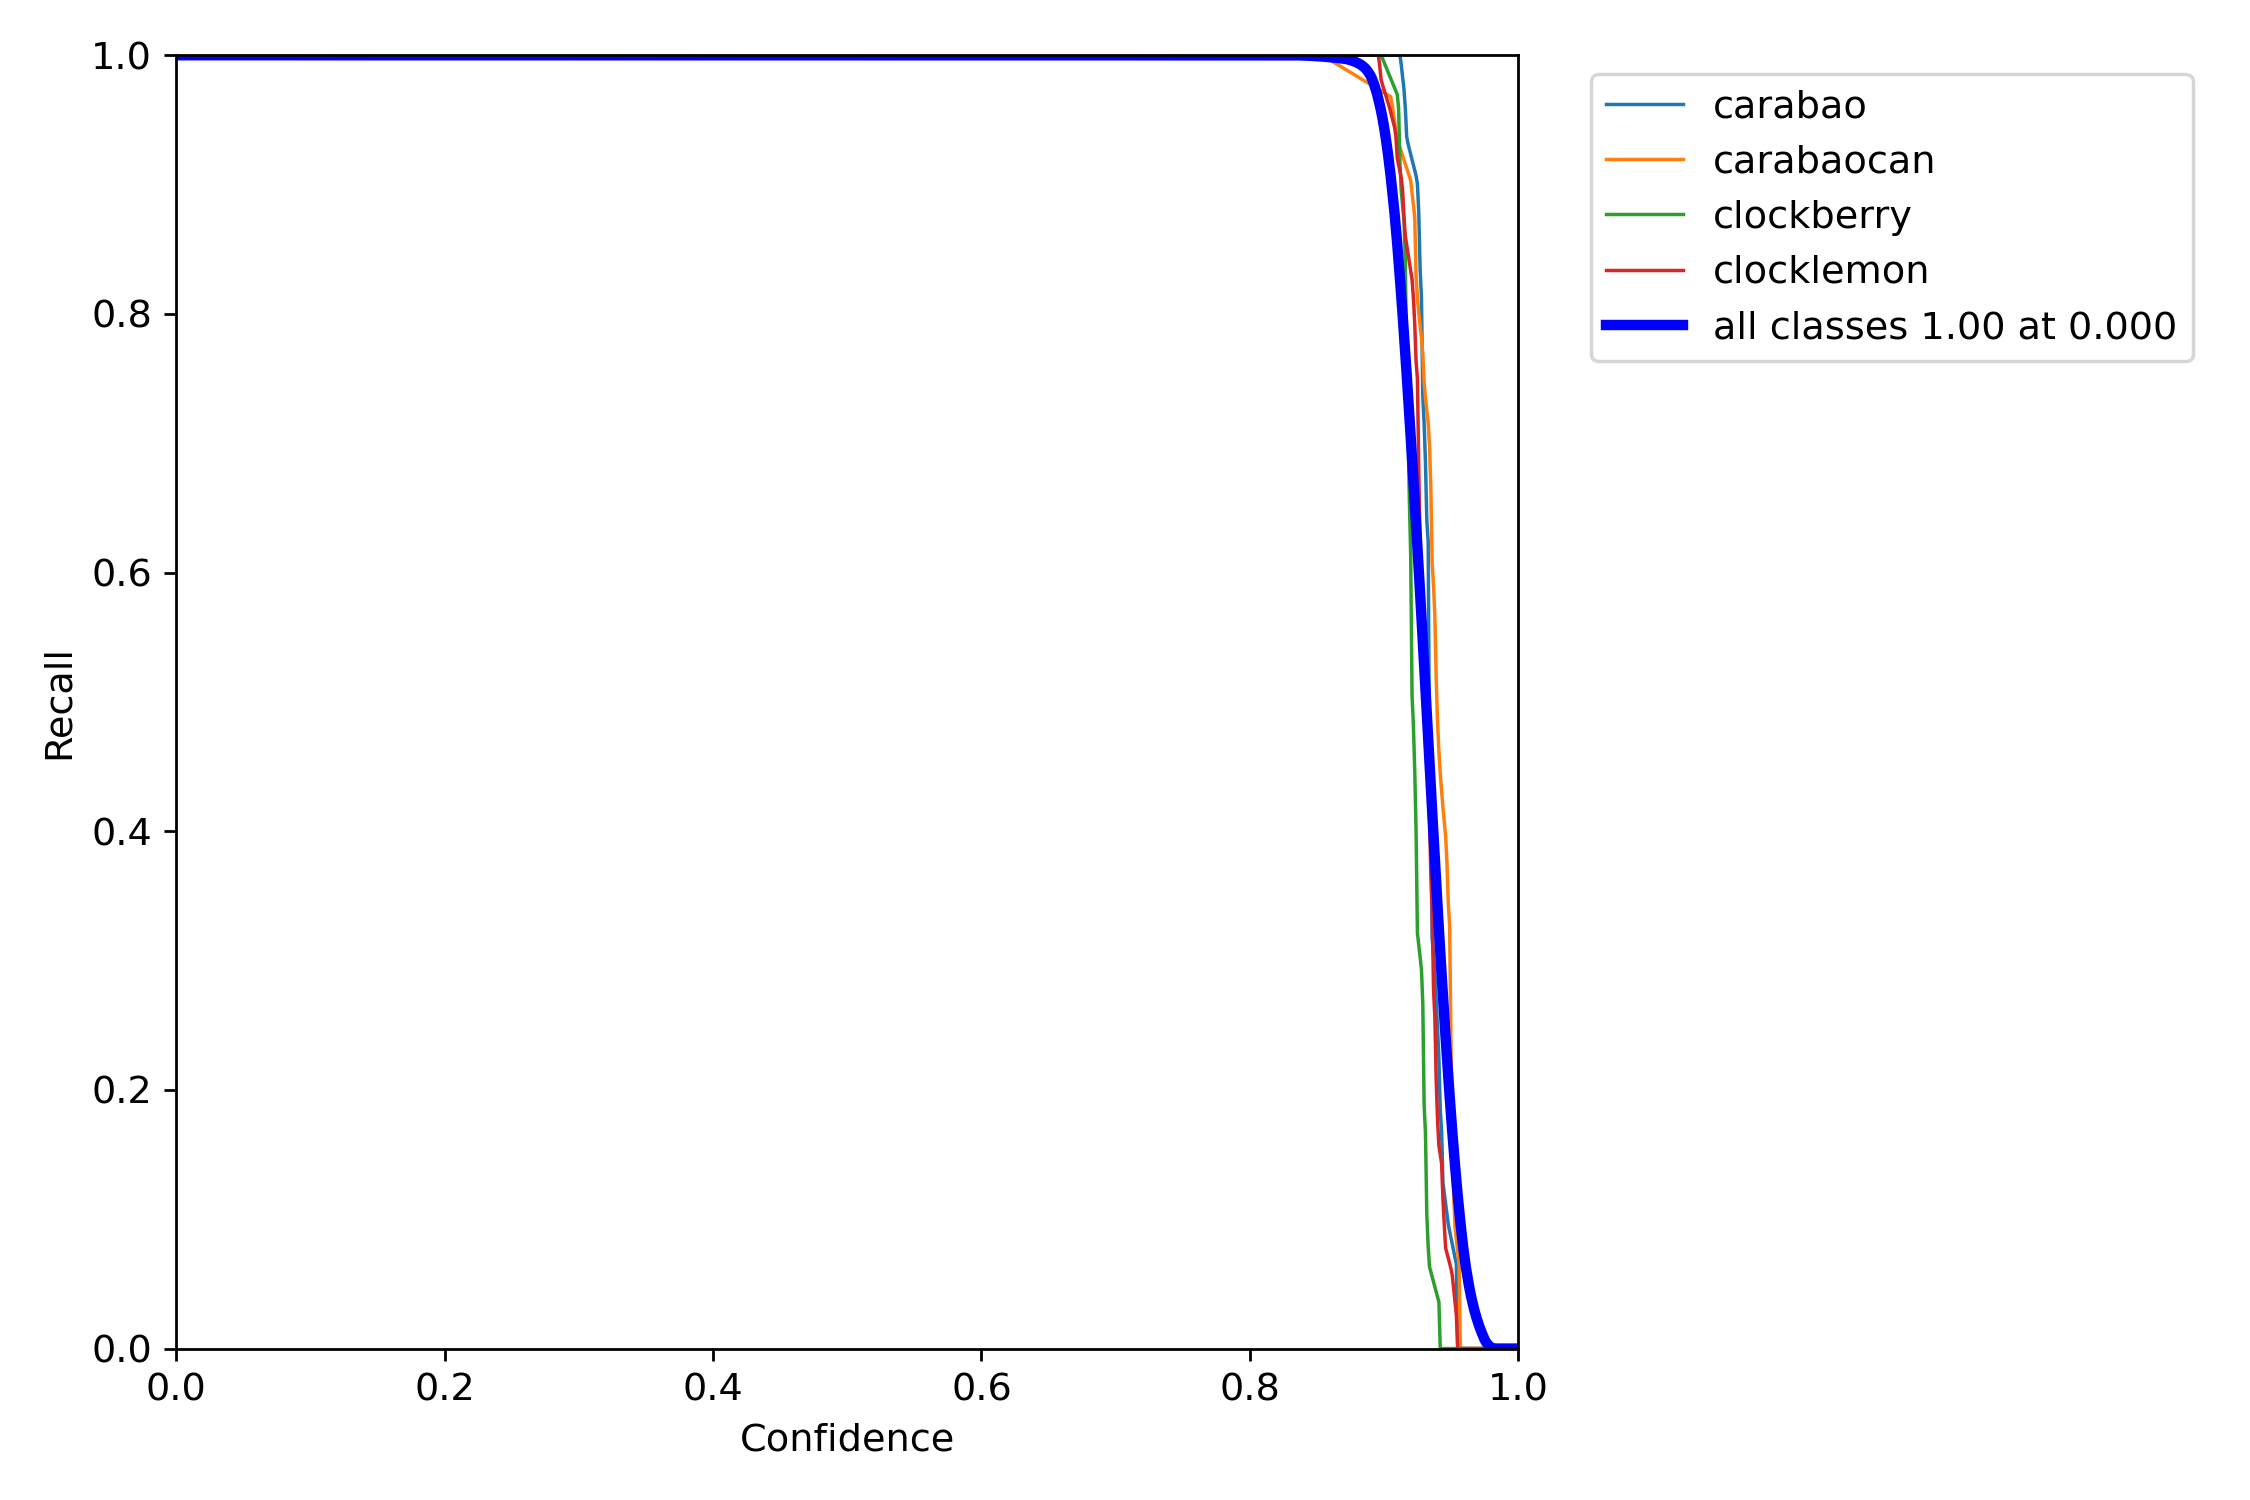

In [ ]:
# Display Precision
Image('/content/yolov5/runs/train/training_scratch/R_curve.png', width=1000)

### F1 Score
F1 score is balancing precision and recall on the positive class (Close to 1 is better)

> $F1 = 2(precision * recall) / (precision + recall)$

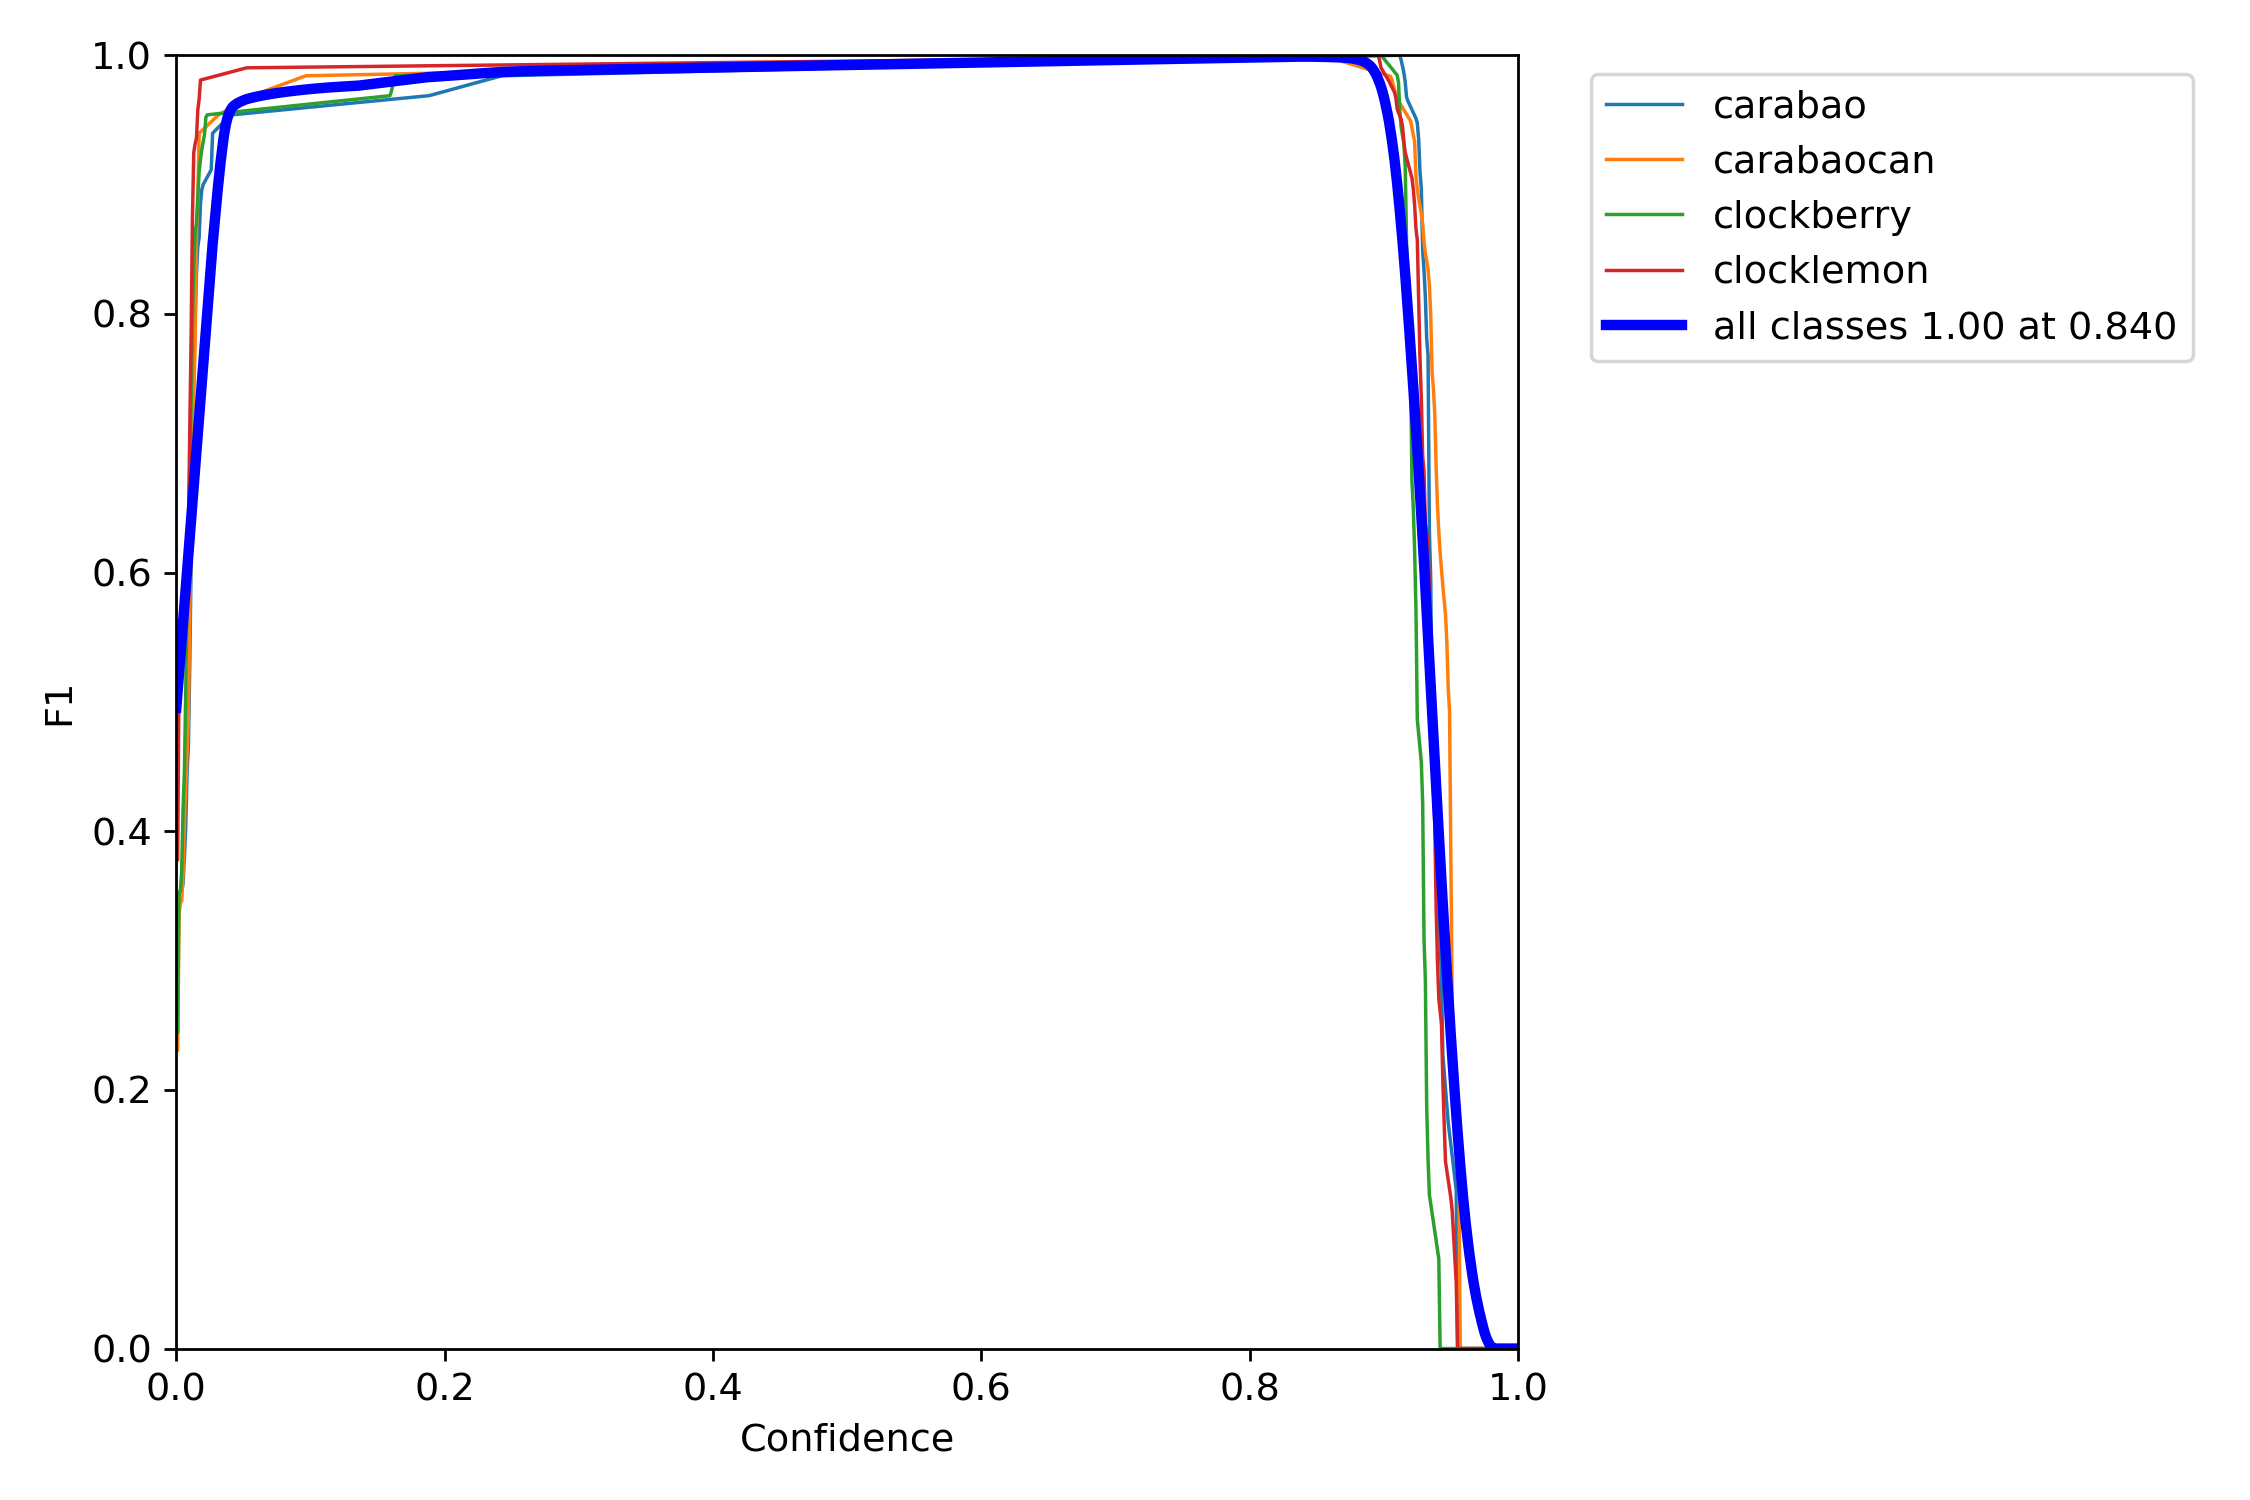

In [ ]:
# Display F1 Score
Image('/content/yolov5/runs/train/training_scratch/F1_curve.png', width=1000)

## Validation results
To evaluate our model, we'll utilize the validation scrip. Performances can be evaluated over the training, validation, or test dataset split.

[Source code for val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)

In [ ]:
!!python val.py --img 416 --batch 128 --data {dataset.location}/data.yaml --weights '/content/yolov5/runs/train/training_scratch/weights/best.pt' --name 'validate_scratch'

["\x1b\x1bval: \x1bdata=/content/yolov5/drinkDetector-3/data.yaml, weights=['/content/yolov5/runs/train/training_scratch/weights/best.pt'], batch_size=128, imgsz=416, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=validate_scratch, exist_ok=False, half=False, dnn=False",
 'YOLOv5 🚀 v6.1-325-g3e85863 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)',
 '',
 'Fusing layers... ',
 'Model summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs',
 '',
 "\x1b\x1bval: \x1bScanning '/content/yolov5/drinkDetector-3/valid/labels.cache' images and labels... 31 found, 0 missing, 0 empty, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]",
 "\x1b\x1bval: \x1bScanning '/content/yolov5/drinkDetector-3/valid/labels.cache' images and labels... 31 found, 0 missing, 0 empty, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]",
 '',
 '       

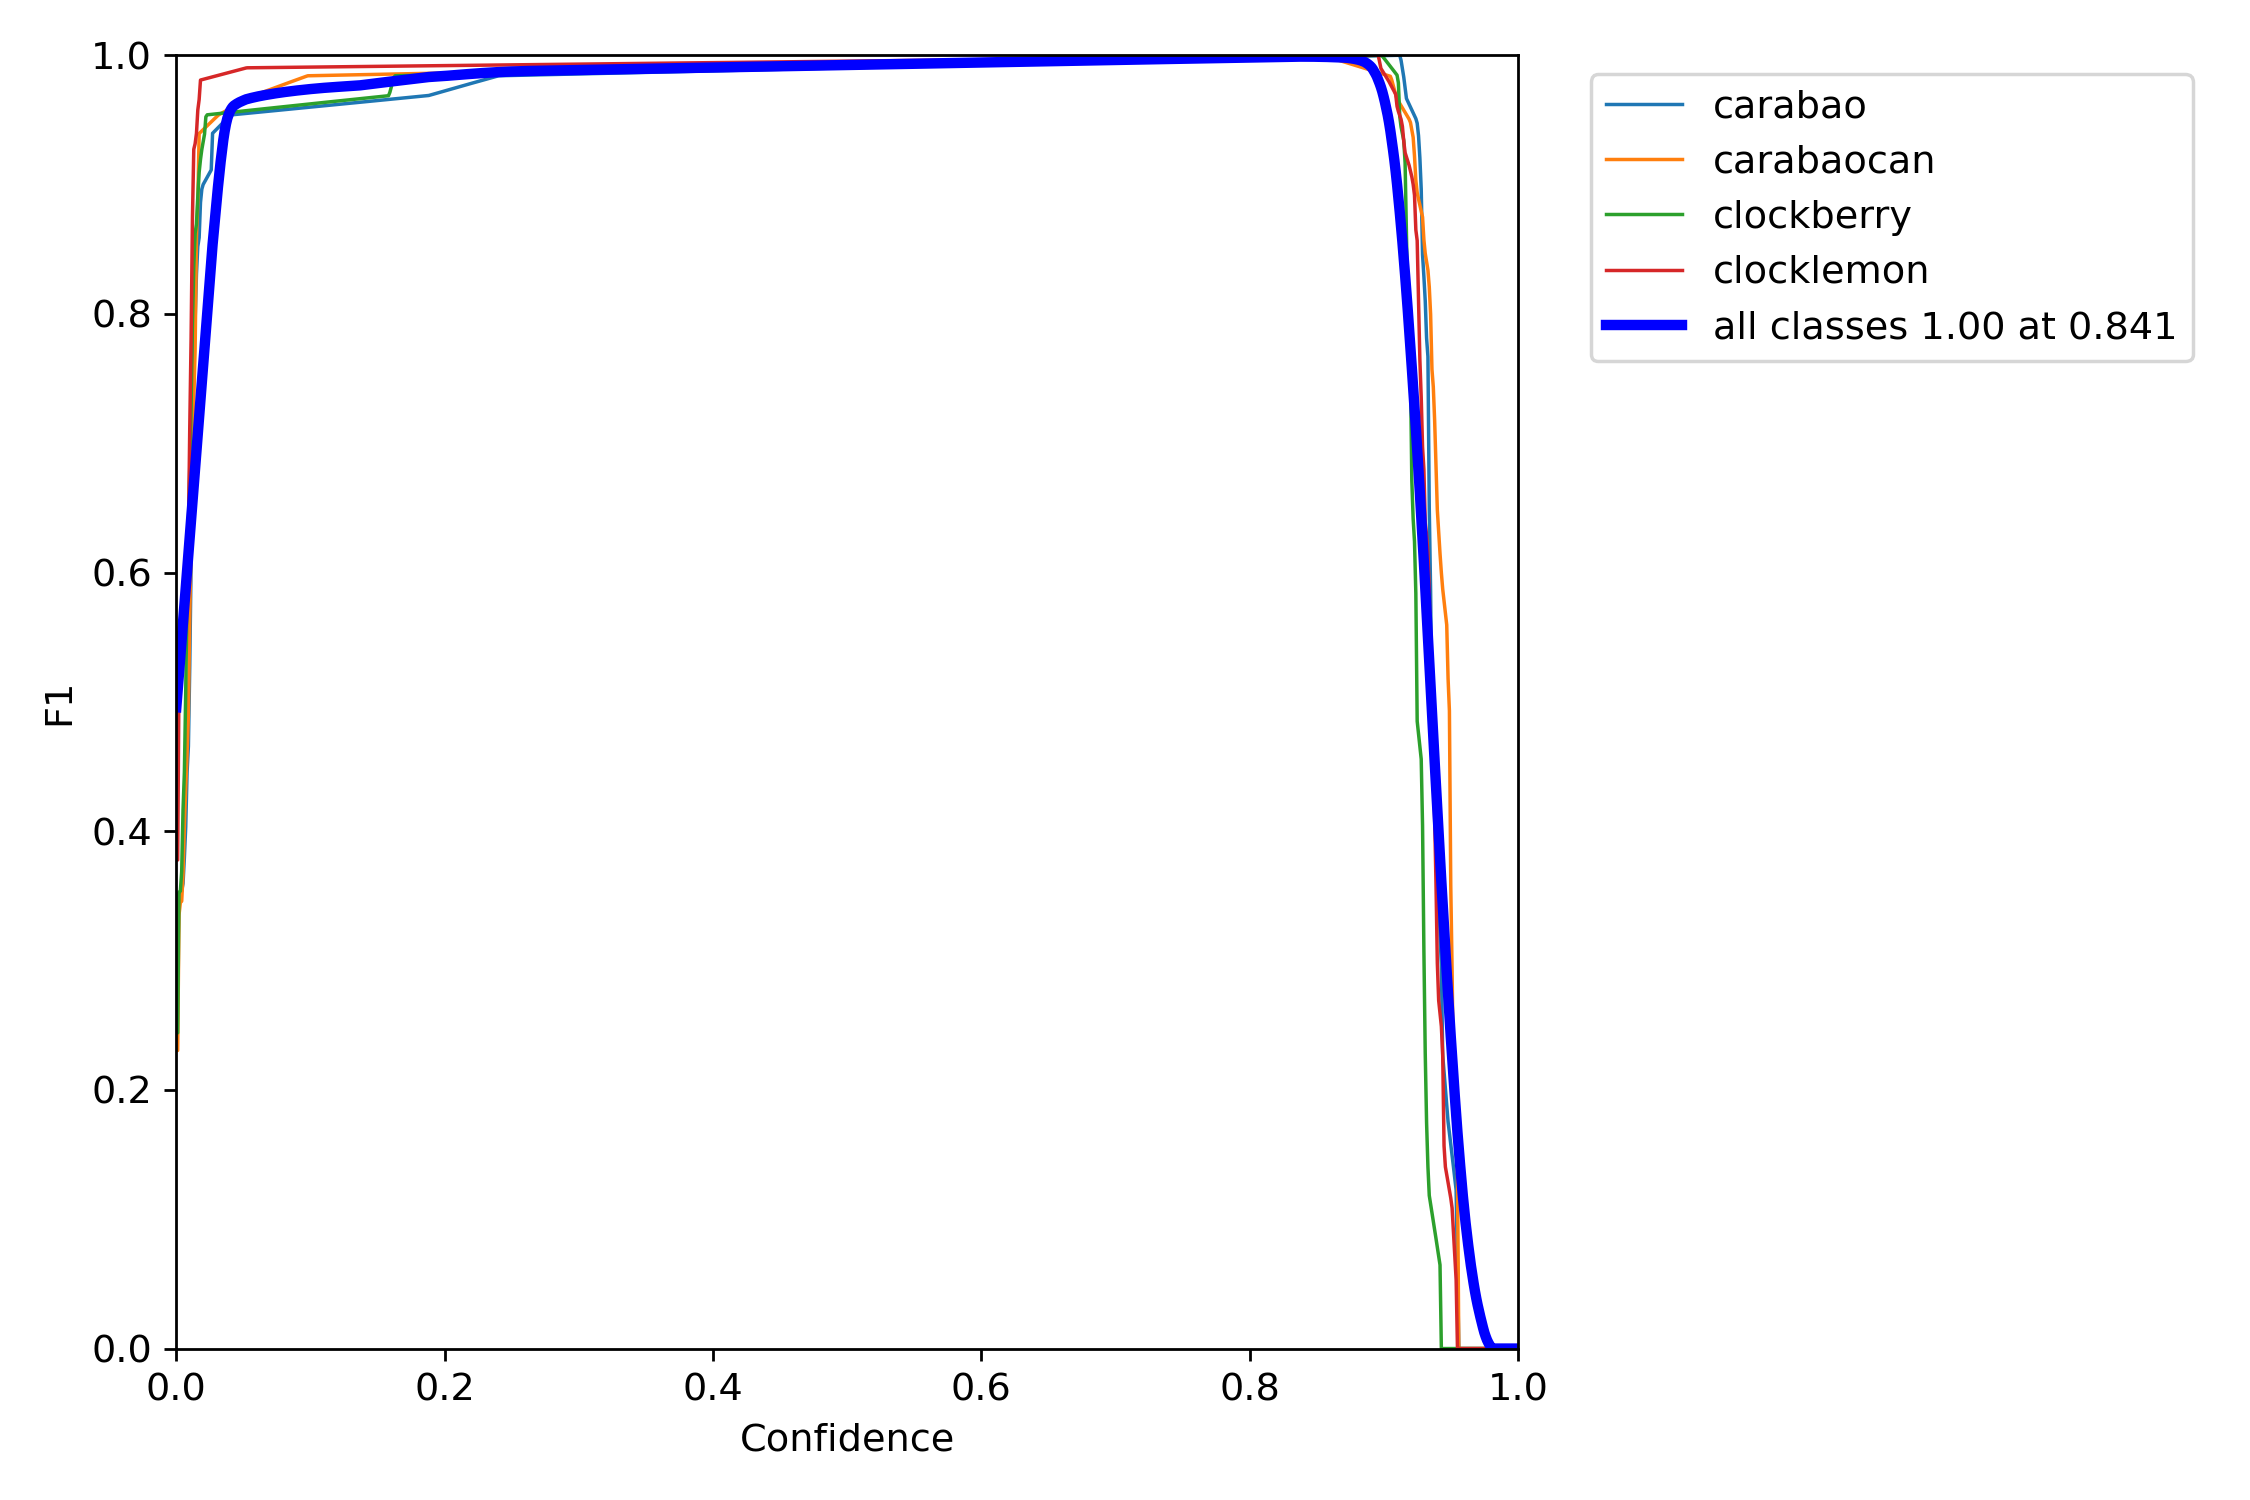

In [ ]:
# Display Precision-Recall curve, which automatically saved at each validation
Image('/content/yolov5/runs/val/validate_scratch/F1_curve.png', width=1000)

## Summary of first trained model

Our trained model from scratch with YOLOv5s is already have a very good result and it's not even overfit. It has F1-Curve of 1 from 0.1 to 0.9 and drop to 0 around confidence rate at 0.95

# Model 2: Transfer learning Model 🧑‍🔧
Since my dataset is relatively small, transfer learning is expected to produce better results than training from scratch.

Our model will be initialized with weights from a pre-trained model by passing the model's name to the 'weighs' argument. The pre-trained model will be automatically downloaded.

## Feature exraction
Models are composed of two main parts: the backbone layers, which serve as a feature extractor, and the head layers, which compute the output predictions. To further compensate for the dataset size, we will use the same backbone as the pretrained COCO model and only train the model's head. For example, YOLOv5s6 backbone consists of 12 layers, who will be fixed by the `freeze` arguement.

In [ ]:
!python train.py --img 416 --batch 32 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --freeze 12 --name 'transfer_learning' --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/drinkDetector-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=transfer_learning, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.1-325-g3e85863 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, 

# Visualizing Model 2 results

### Confusion matrix
When we are trying to classify things, a confusion matrix is a table used to define a classification algorithm's performance.

From the visualizes below, we could say that our model works almost perfectly because it predicts almost a perfect score which is more than 90%.

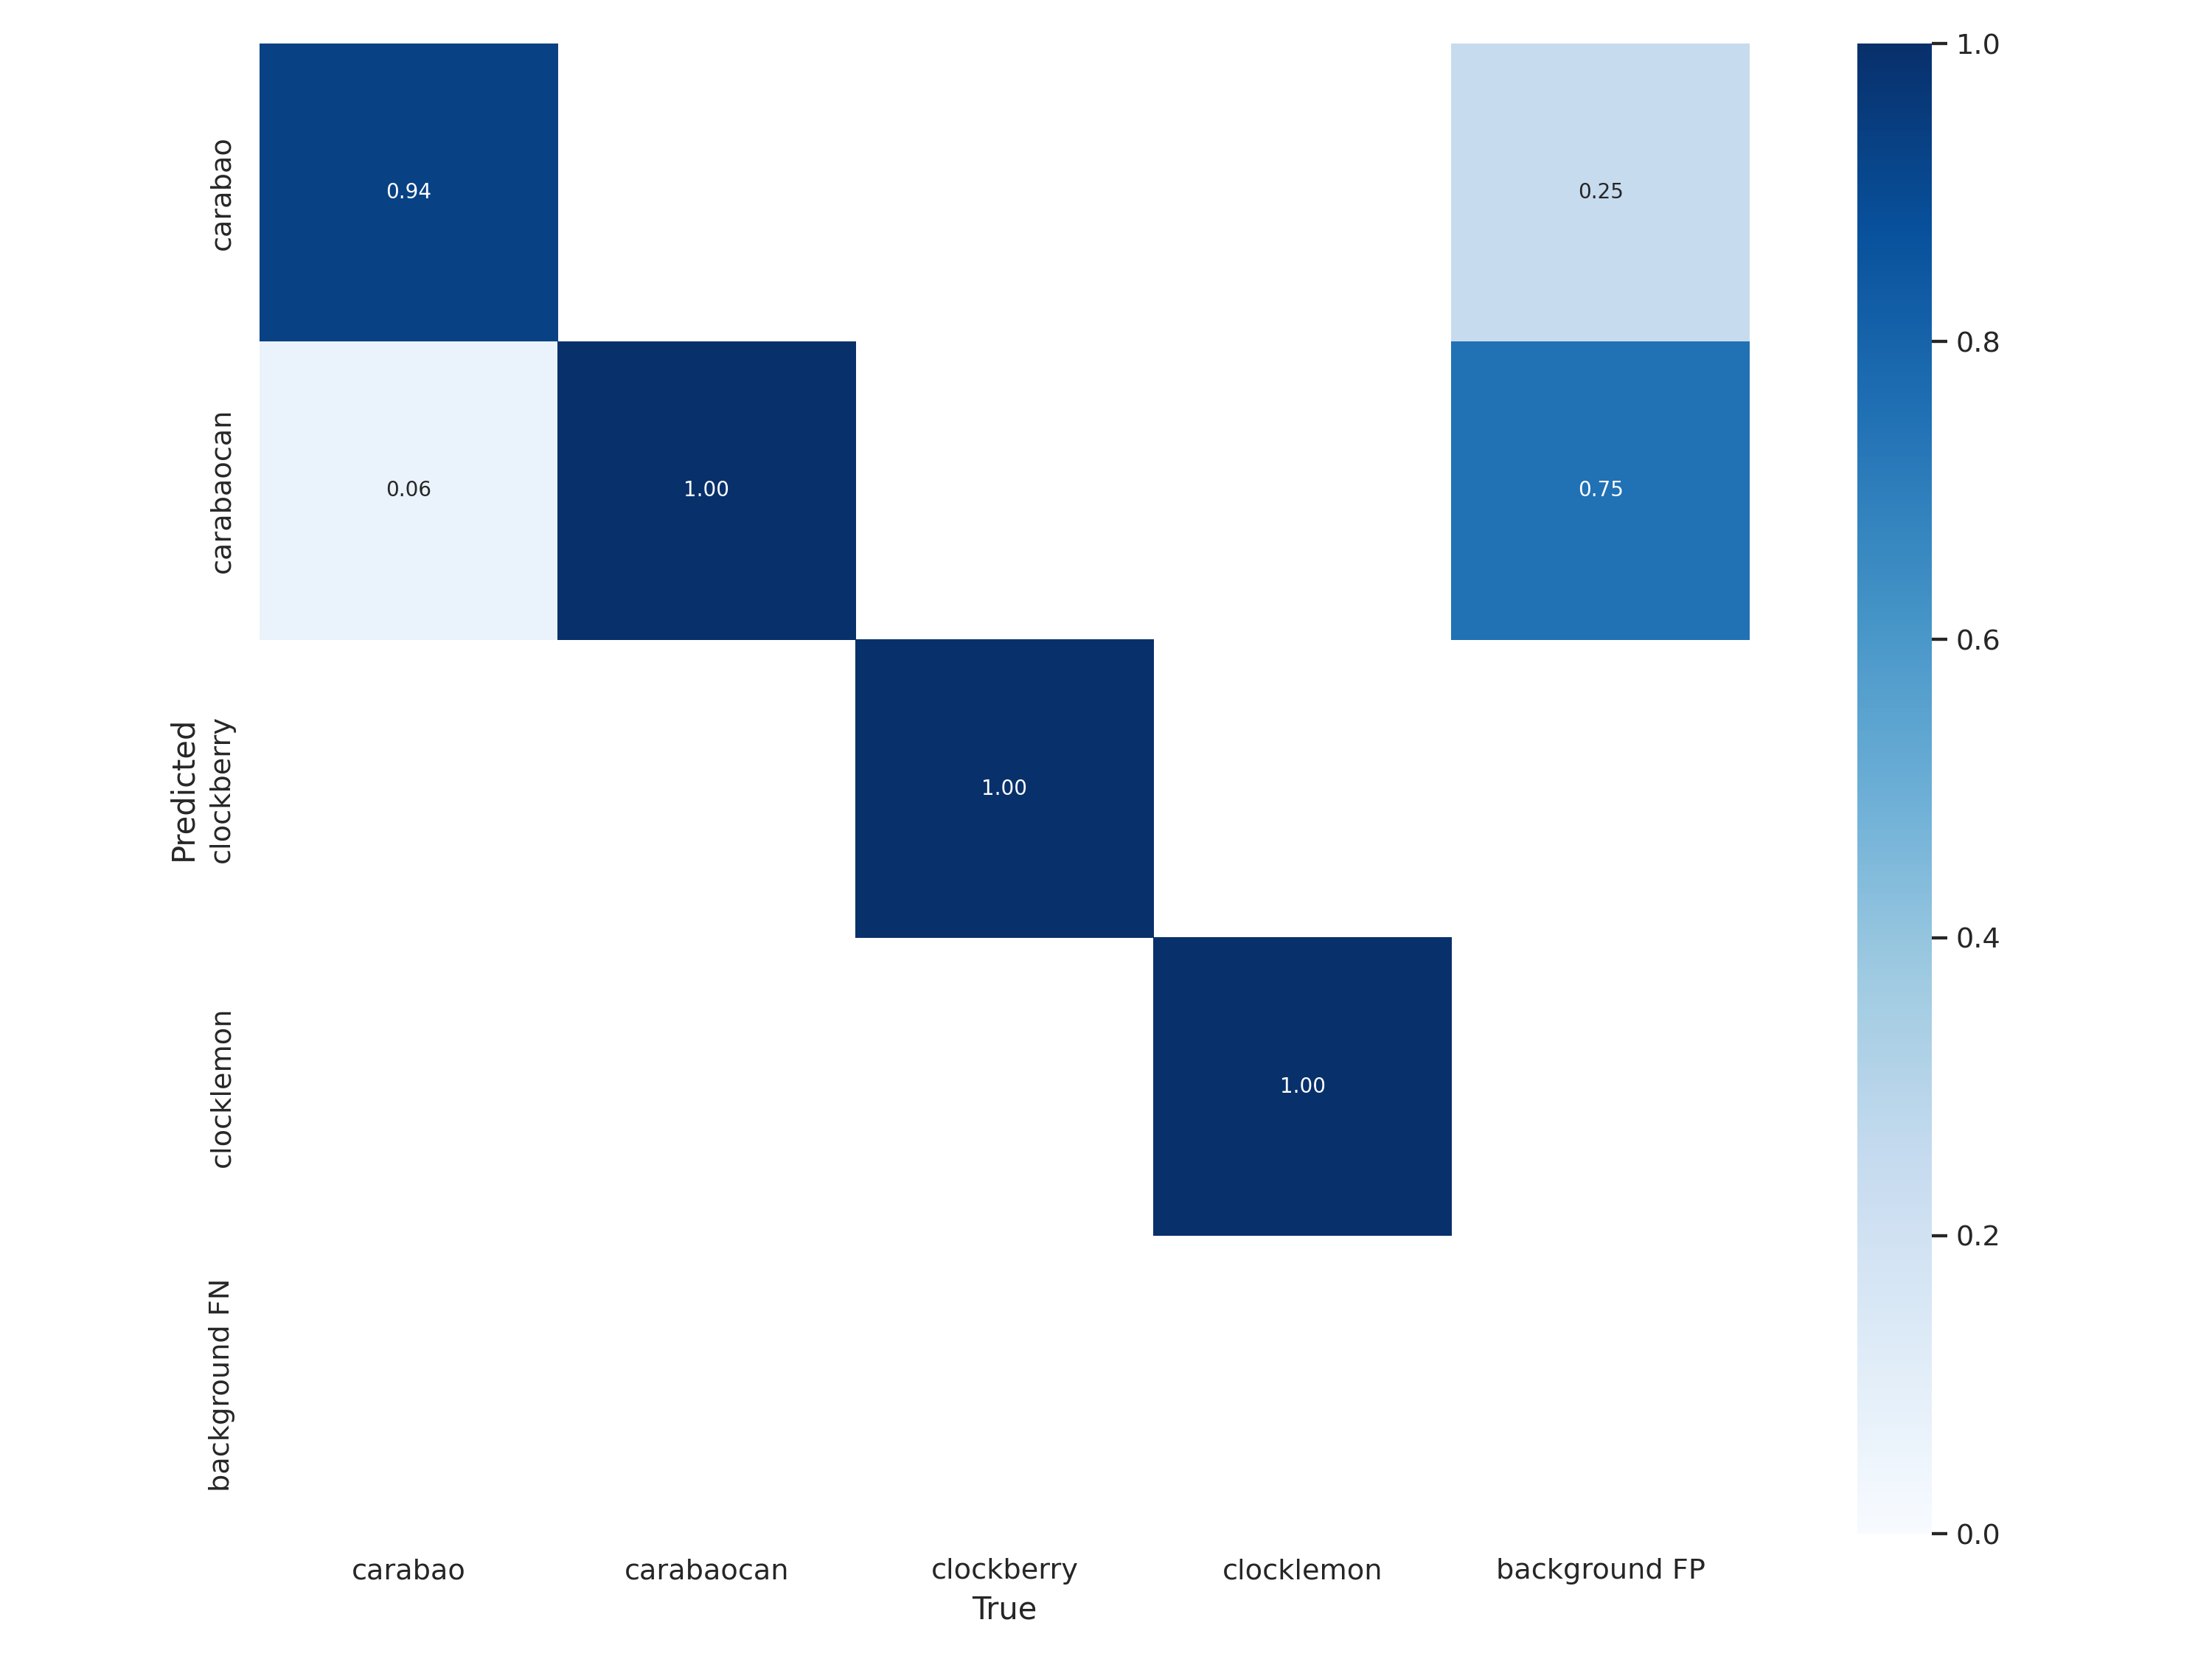

In [ ]:
# Display Confusion Matrix
Image('/content/yolov5/runs/train/transfer_learning/confusion_matrix.png', width=1000)

### Precision
Precision is a metric that quantifies the number of correct positive predictions made.

> $Precision= TruePositive/(TruePositve+FalsePositive)$




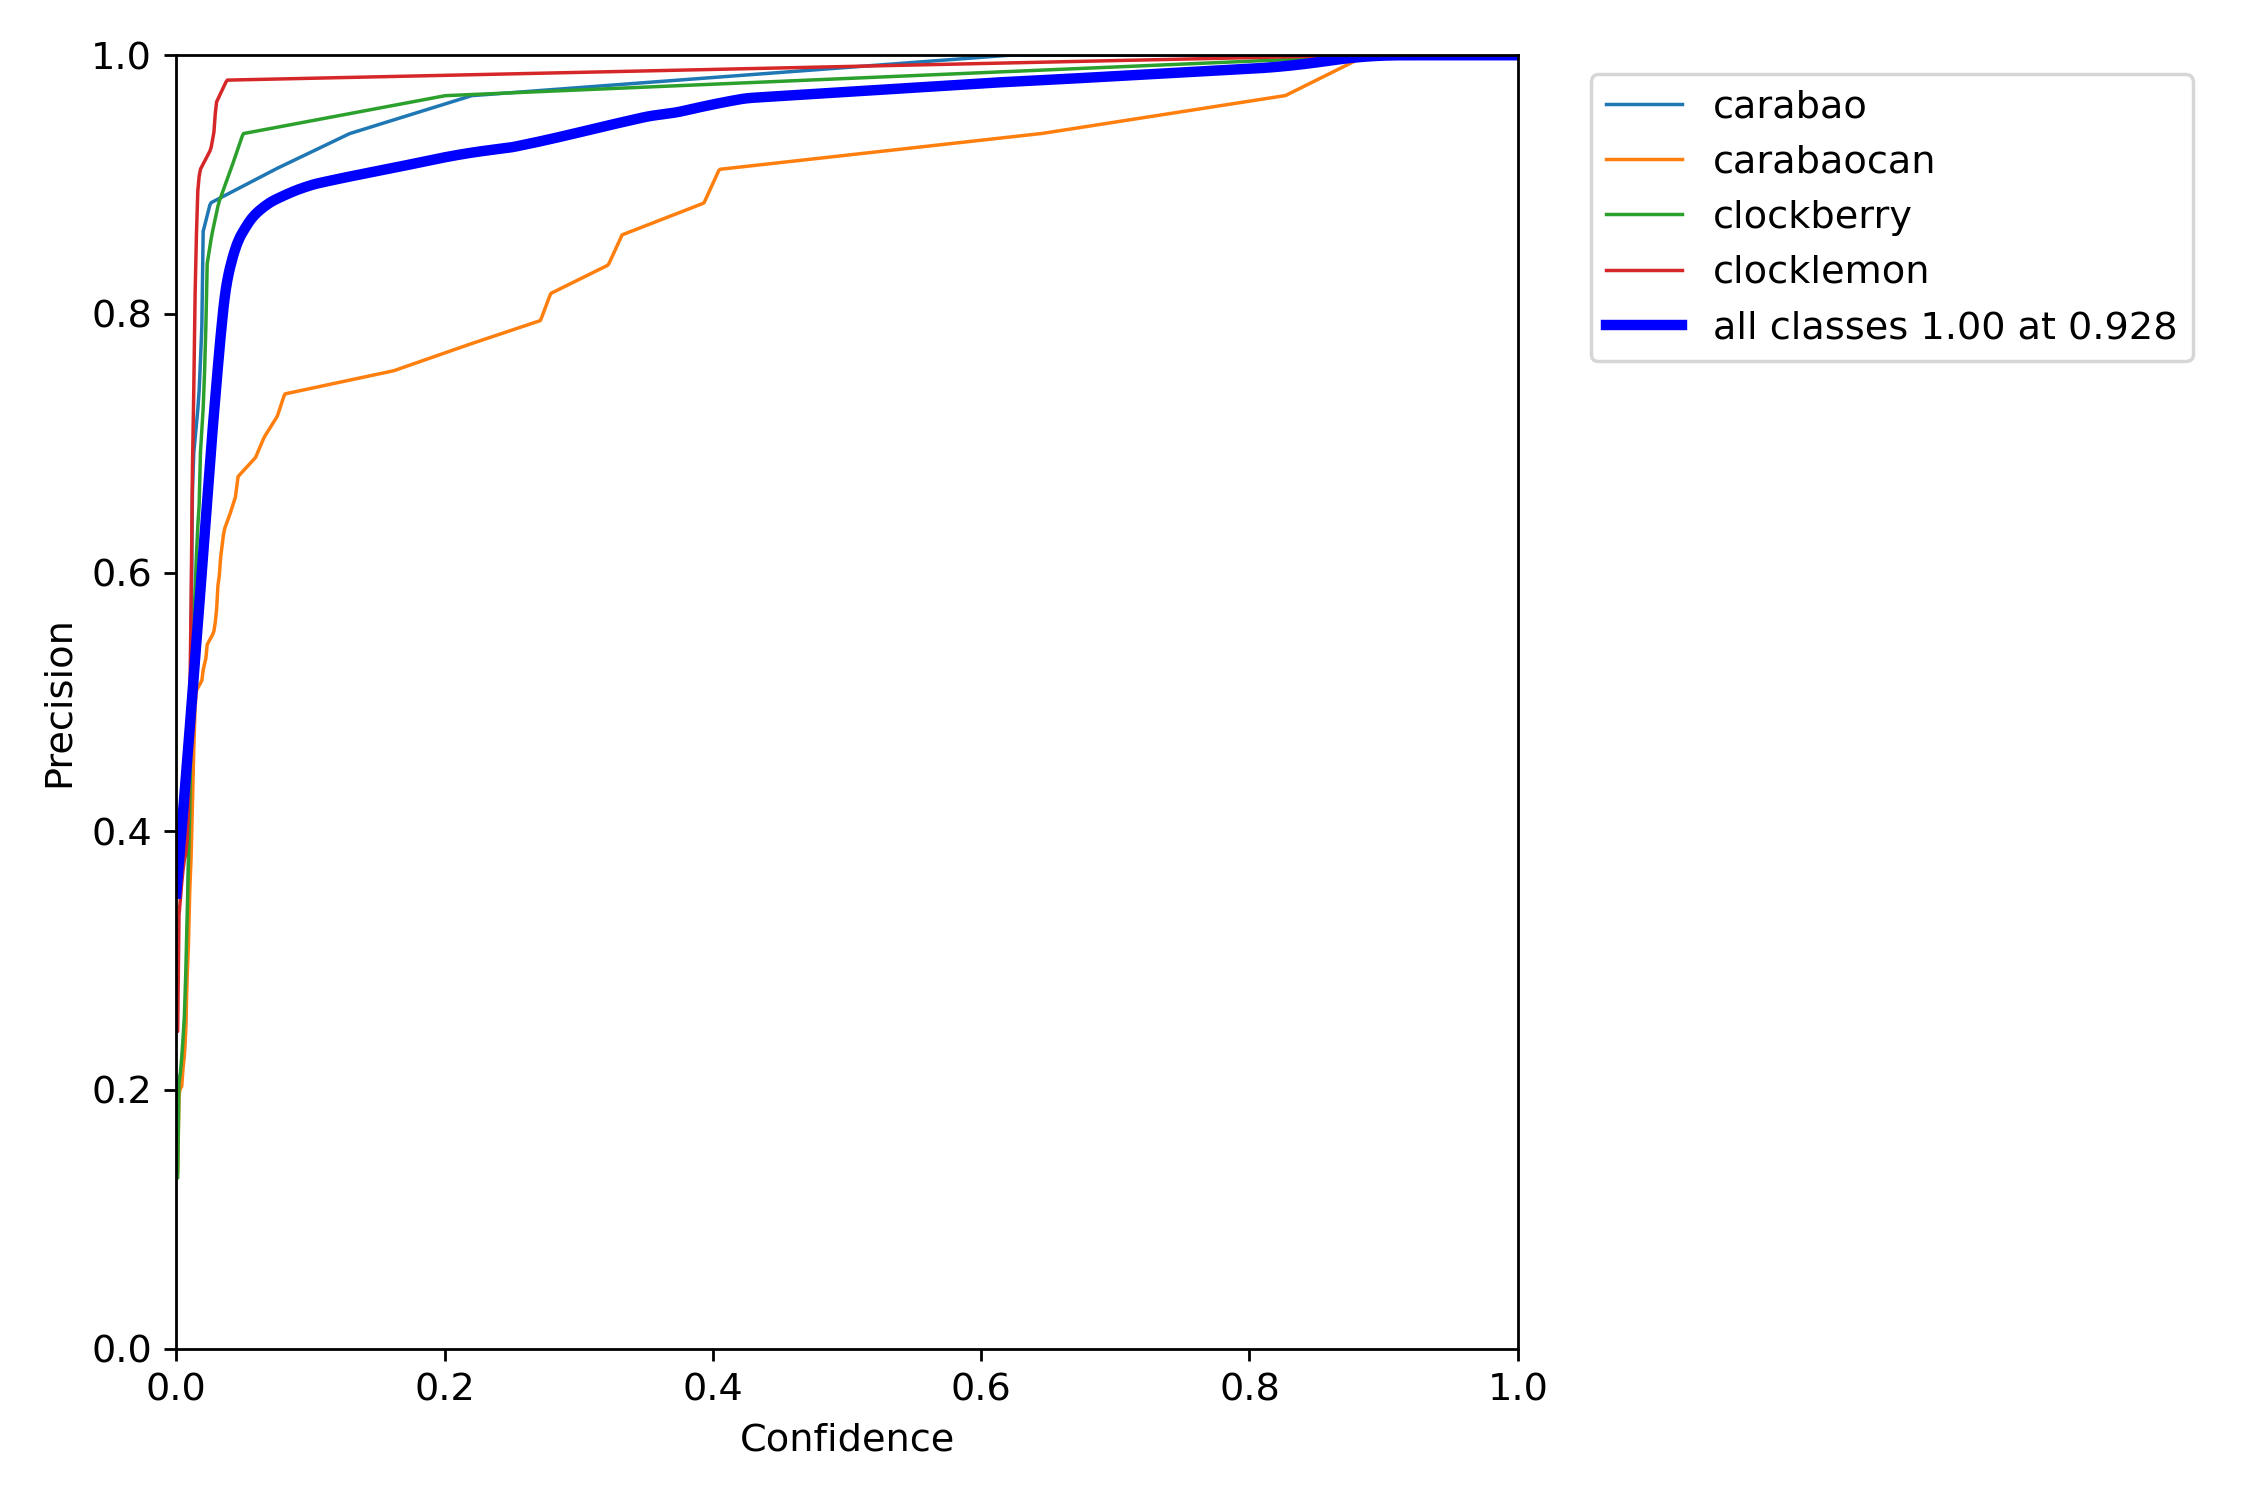

In [ ]:
# Display Precision
Image('/content/yolov5/runs/train/transfer_learning/P_curve.png', width=1000)

### Recall
Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

> $Recall = TruePositive/(TruePositve+FalseNegative)$




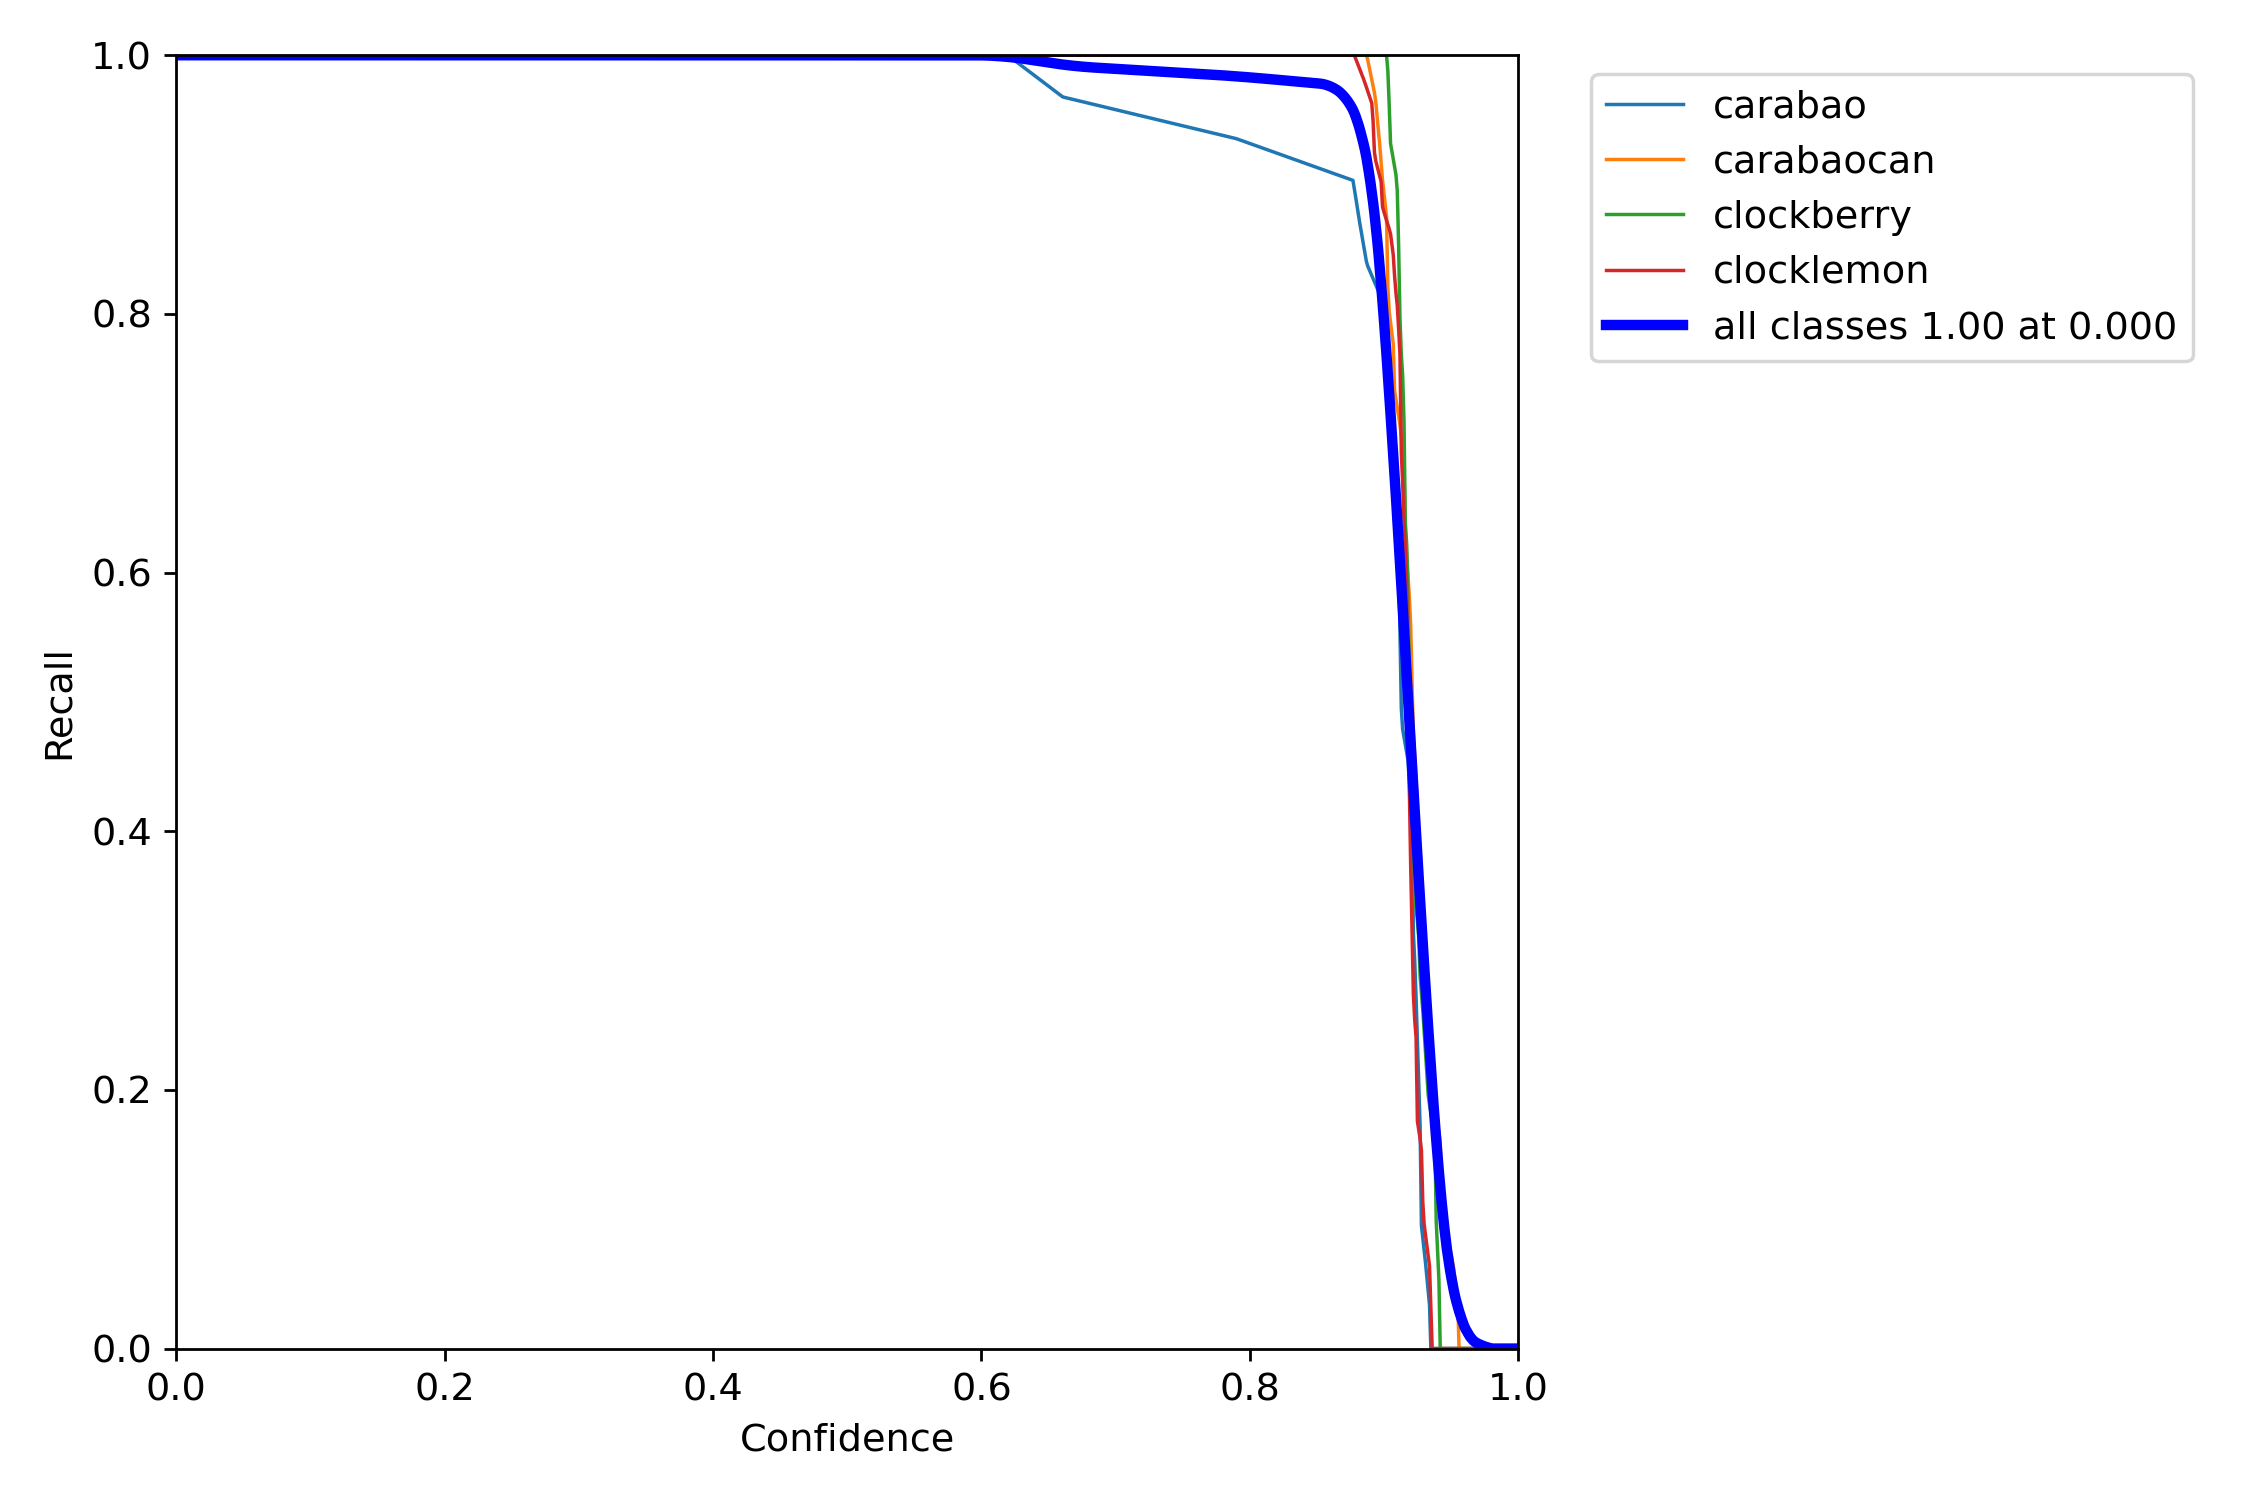

In [ ]:
# Display Precision
Image('/content/yolov5/runs/train/transfer_learning/R_curve.png', width=1000)

### F1 Score
F1 score is balancing precision and recall on the positive class (Close to 1 is better)

> $F1 = 2(precision * recall) / (precision + recall)$

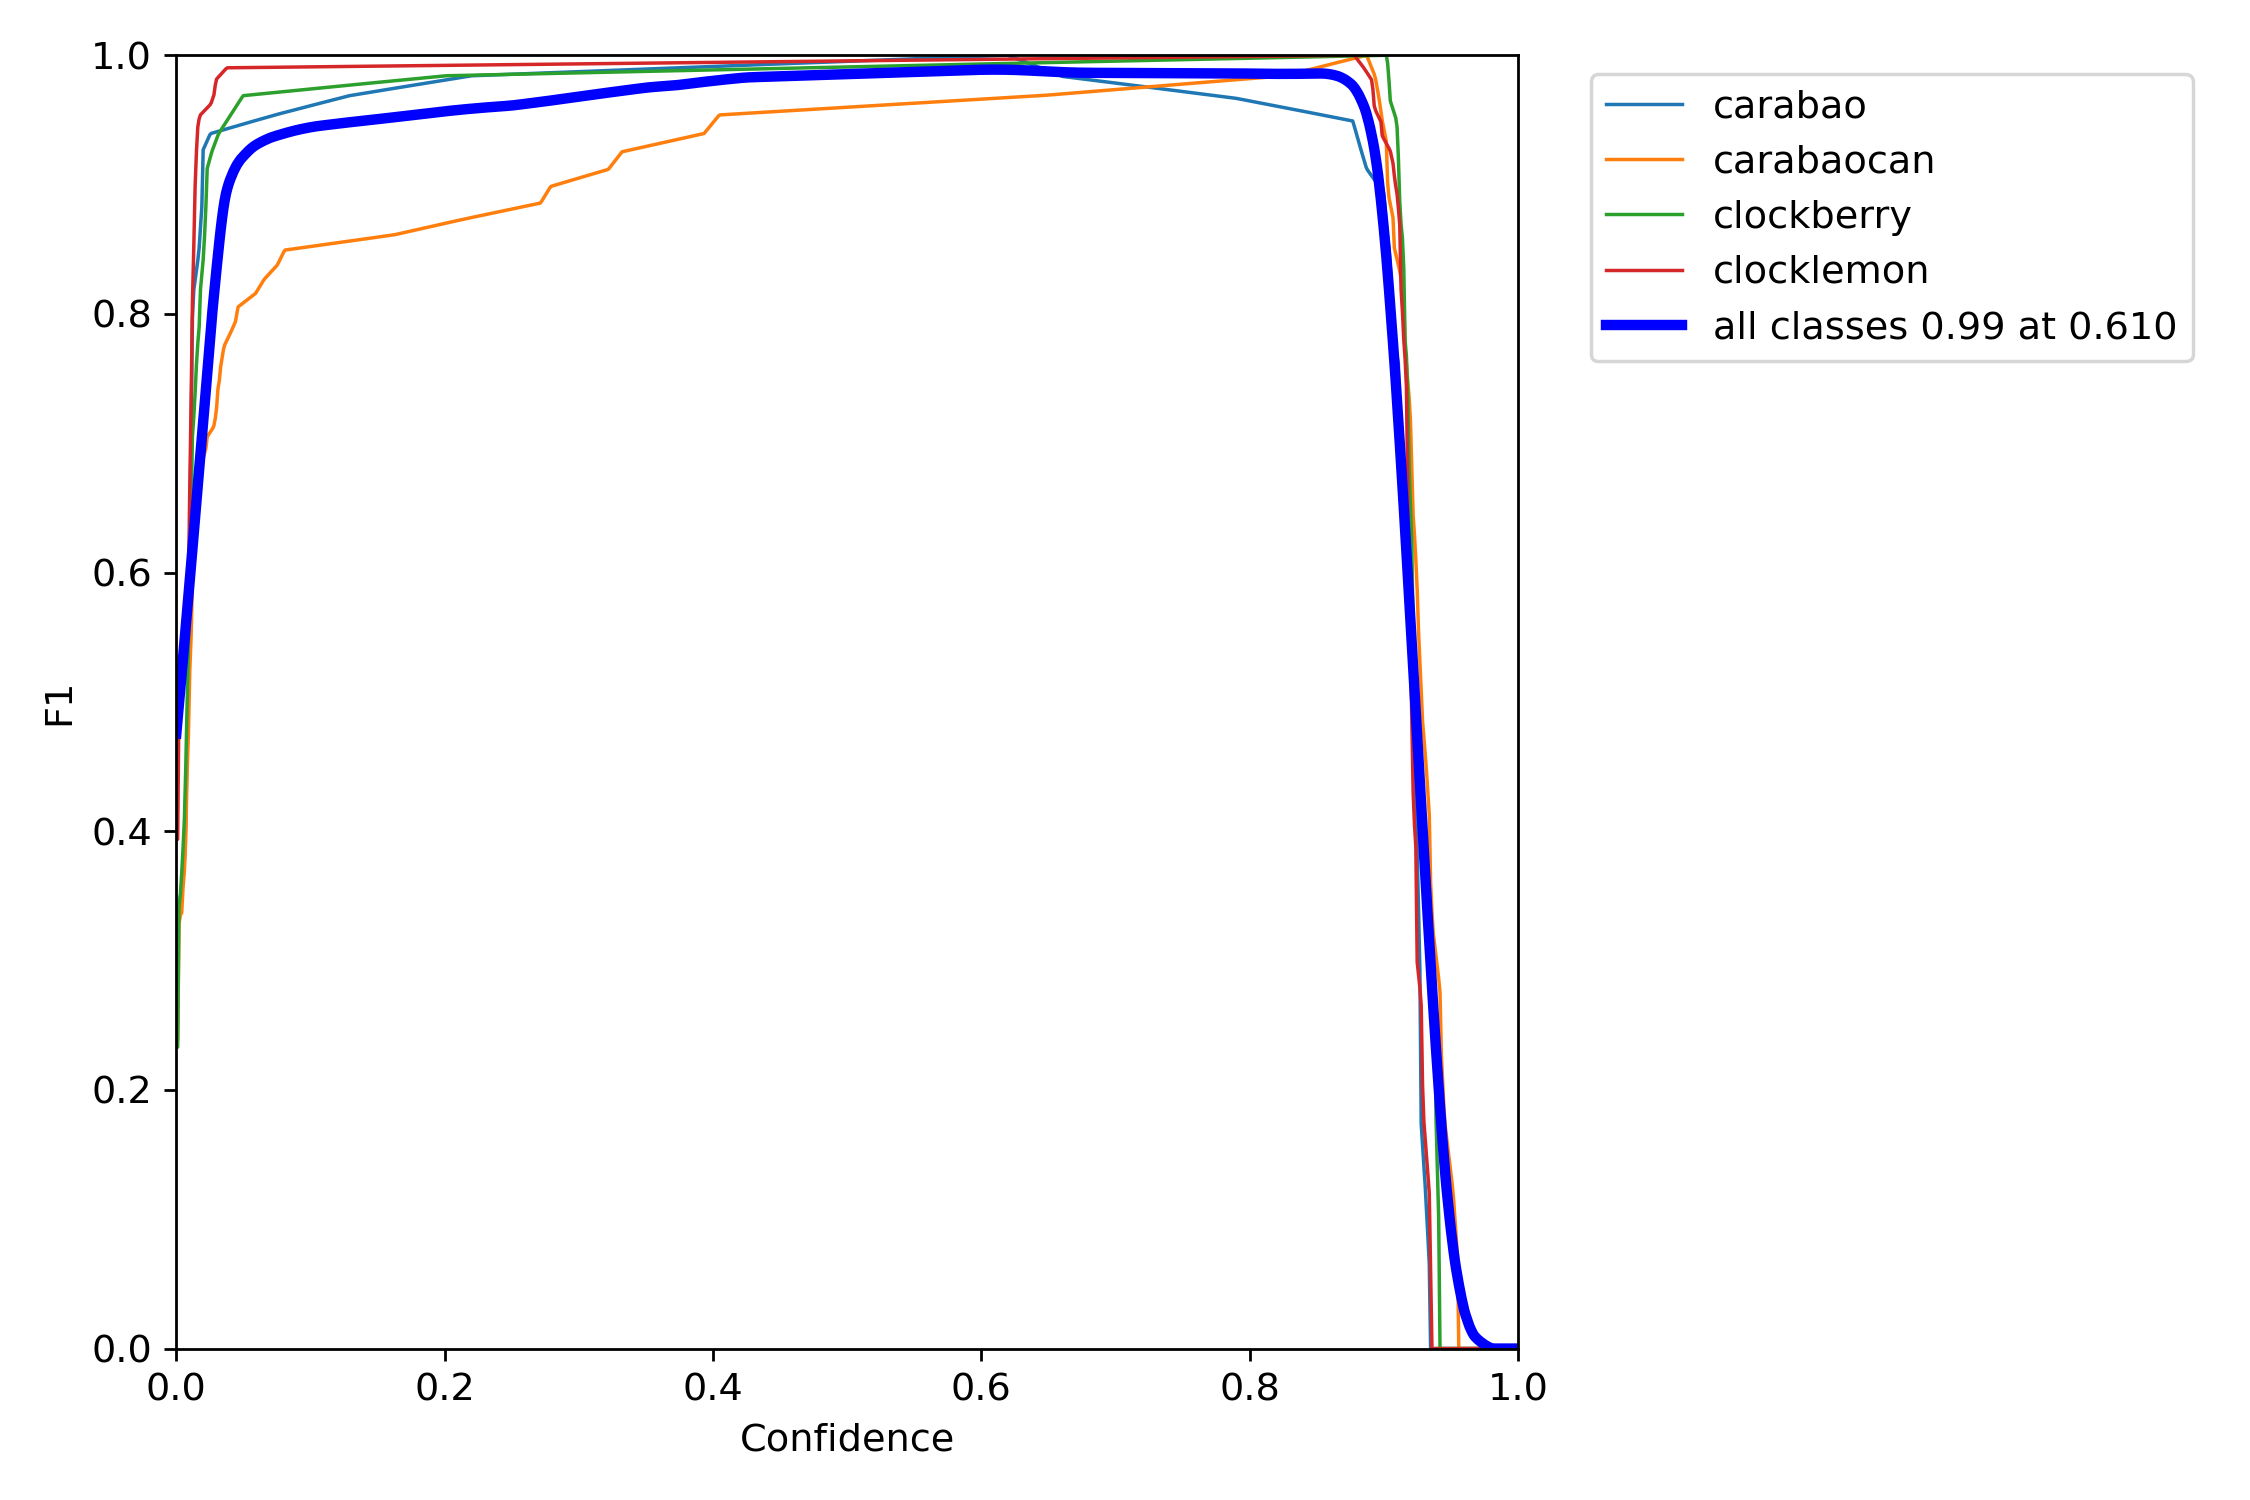

In [ ]:
# Display F1 Score
Image('/content/yolov5/runs/train/transfer_learning/F1_curve.png', width=1000)

## Validation results
To evaluate our model we'll utilize the validation scrip. Performances can be evaluated over the training, validation or test dataset split.

In [ ]:
!!python val.py --img 416 --batch 128 --data {dataset.location}/data.yaml --weights '/content/yolov5/runs/train/transfer_learning/weights/best.pt' --name 'validate_transfer'

In [ ]:
# Display Precision-Recall curve, which automatically saved at each validation
Image('/content/yolov5/runs/val/validate_transfer/F1_curve.png', width=1000)

## Summary of second trained model

Our transfer learning model have a very good result but it's not much difference from our scratch model above. It has F1-Curve of 1 from 0.1 to 0.9 and drop to 0 around confidence rate at 0.95.

We will use only scratch model to test and detect further.

# Make a prediction on test dataset
`detect.py` runs YOLOv5 inference on a variety of sources.

I will use the best performance model from the epoch that gives the best accuracy specified in the directory below.

* --conf = Confident threshold level, if the model predicts lower than 50%, it will not return the result to data.
* --weights = weights path
* --source = Where we want to predict the data. In this case, I specify on the test images (0 for webcam).

[Source code for detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)

In [ ]:
!python detect.py --weights runs/train/training_scratch/weights/best.pt --img 416 --conf 0.8 --source {dataset.location}/test/images --save-conf

## Summary of the model dataset

From the precision plot below, we can assume that most of all the data has a 100% prediction rate from a confidence rate of 0.0 to around 0.90 and drops dramatically to 0 when the confidence rate is equal to 1.

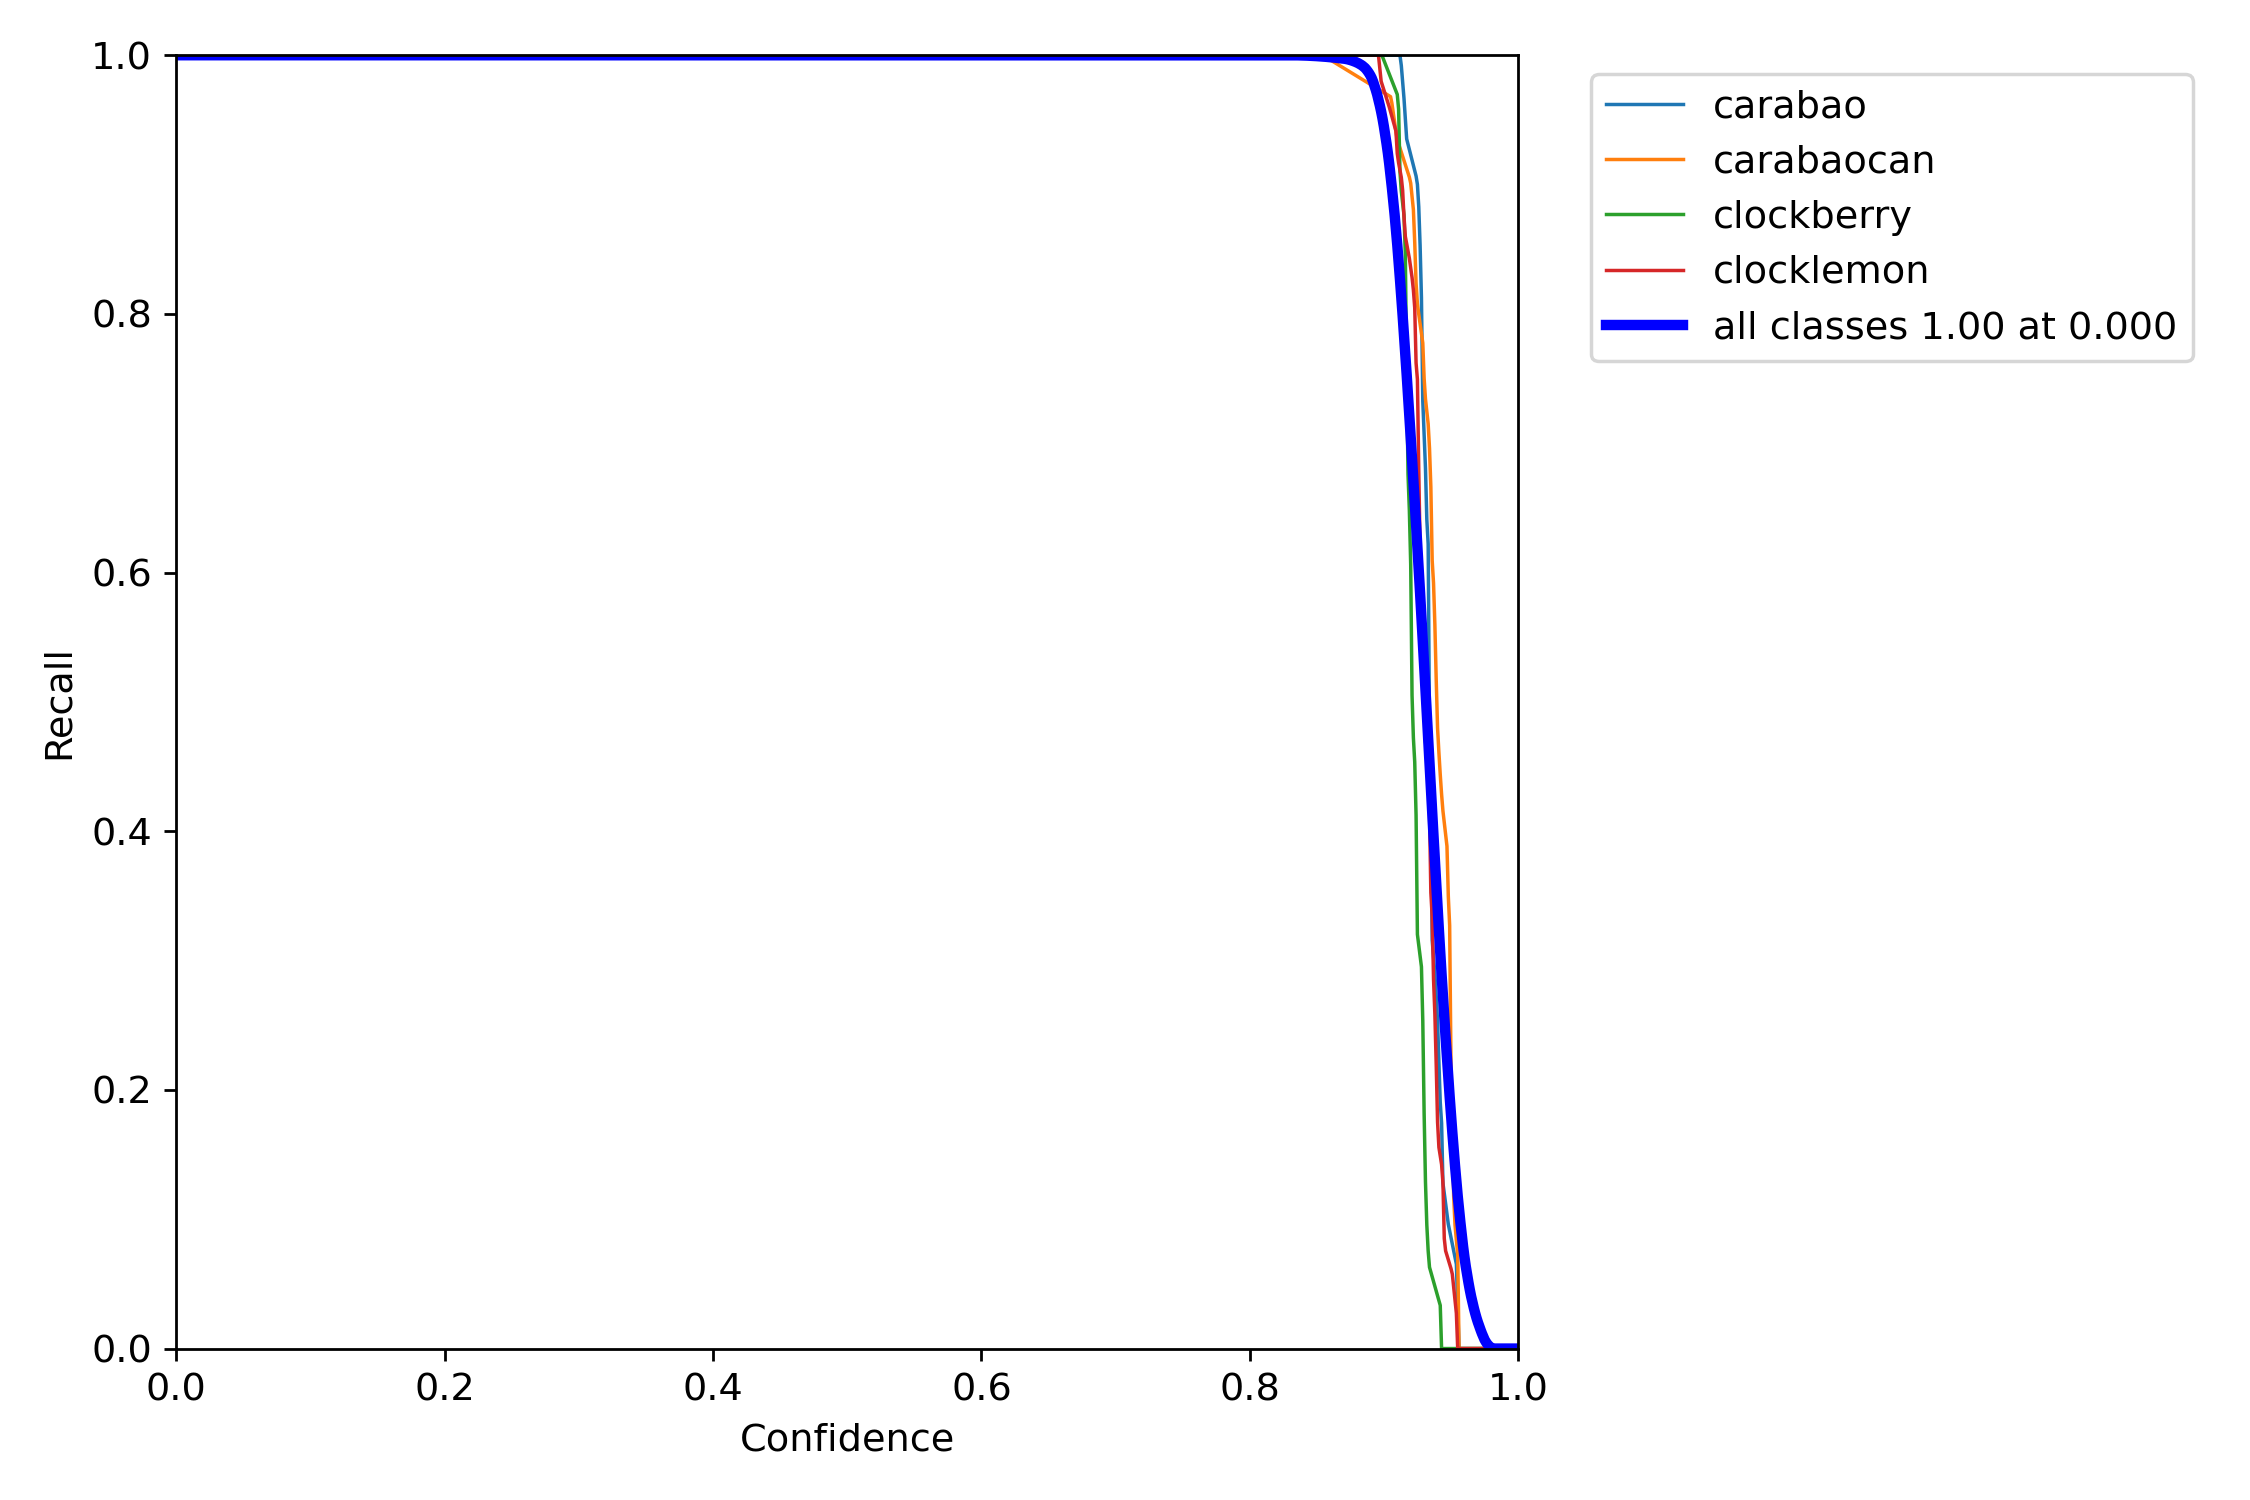

In [ ]:
# Display Precision
Image('/content/yolov5/runs/val/validate_scratch/R_curve.png', width=1000)

### Display Inference Images
After we used the best model we trained with YOLOv5s, we could now see our results on our test dataset. Each photo will tell how much accuracy our model will predict.

And the results are very significant which each of the products give the prediction accuracy of more than 90% in almost every photo.

Image No.: 1


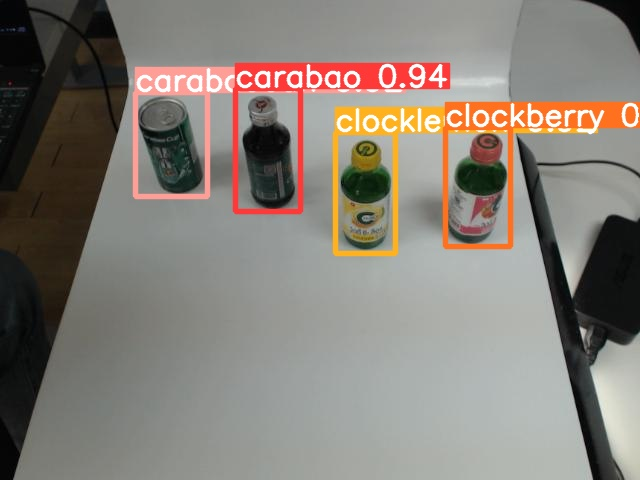



Image No.: 2


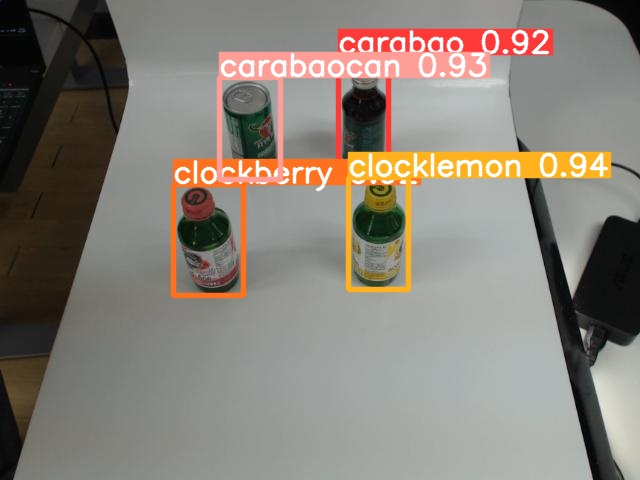



Image No.: 3


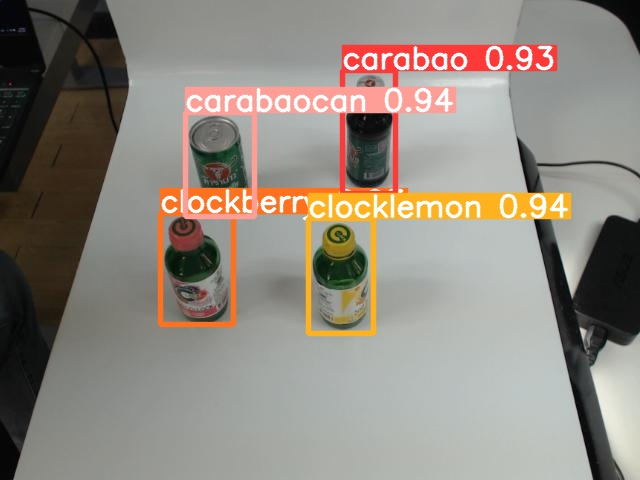



Image No.: 4


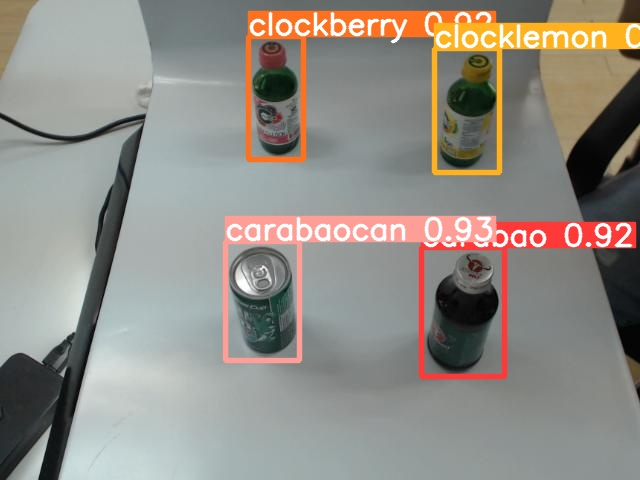



Image No.: 5


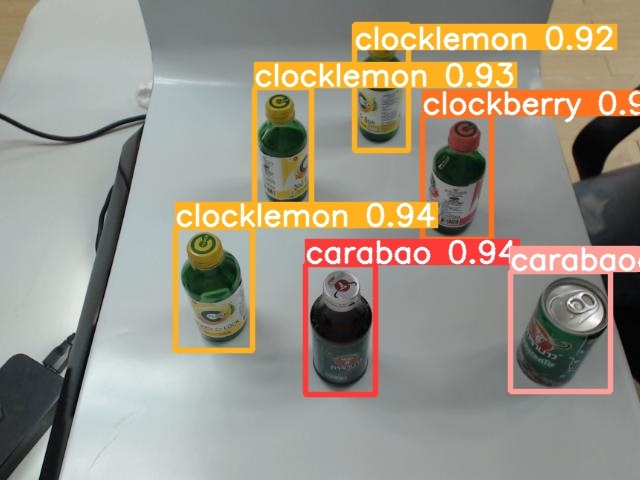



Image No.: 6


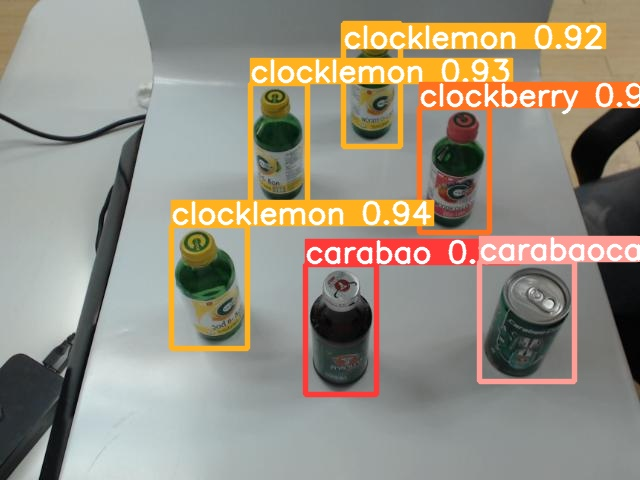



Image No.: 7


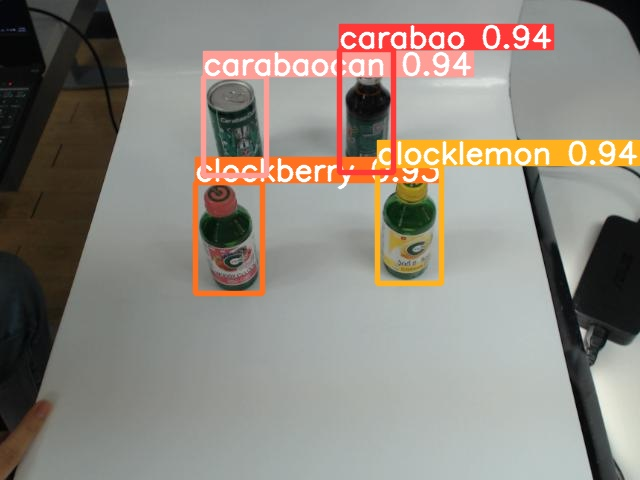



Image No.: 8


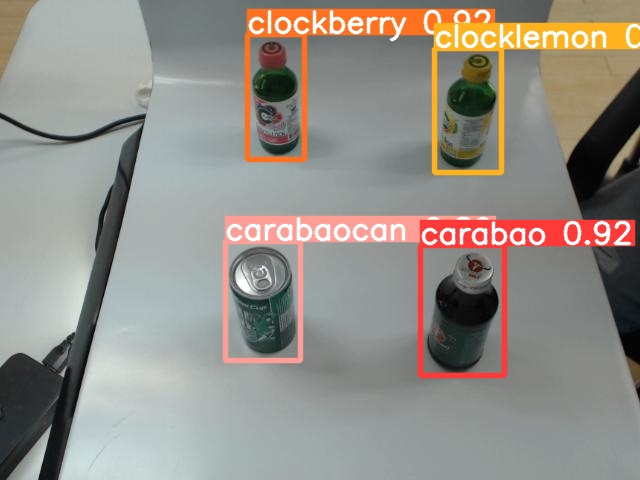



Image No.: 9


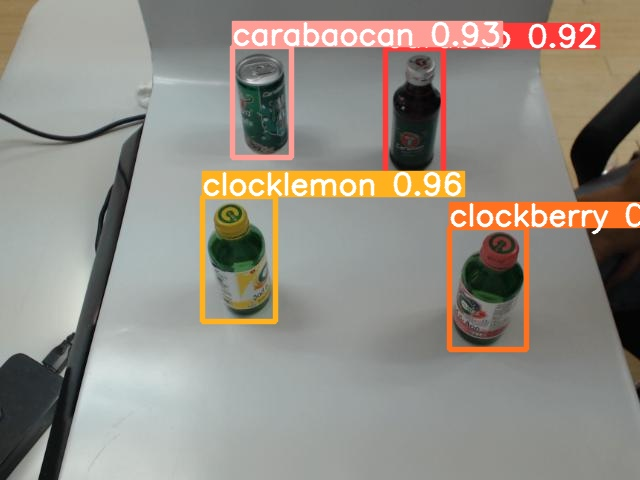



Image No.: 10


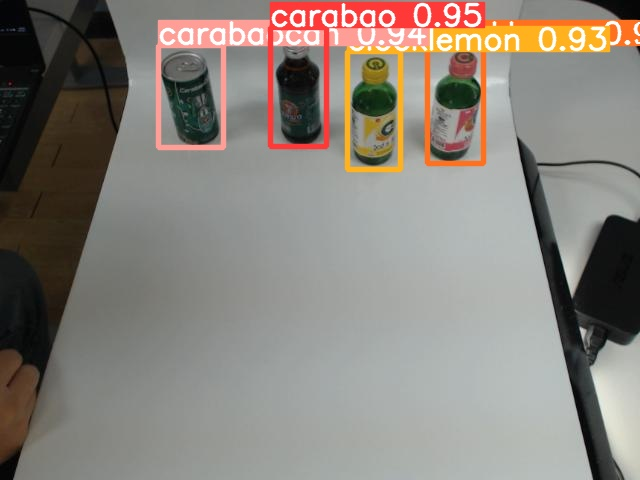



Image No.: 11


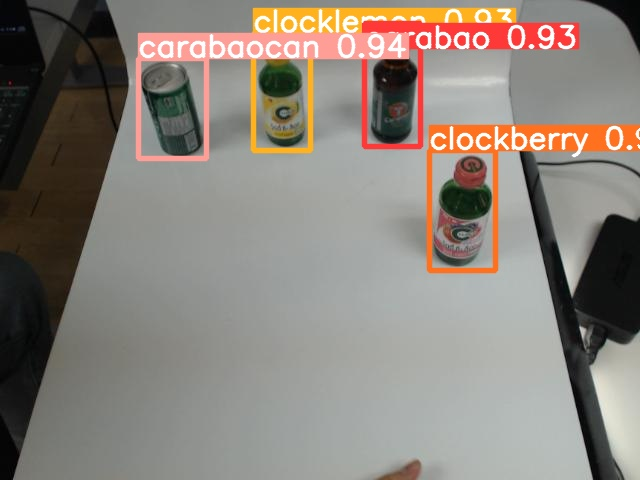



Image No.: 12


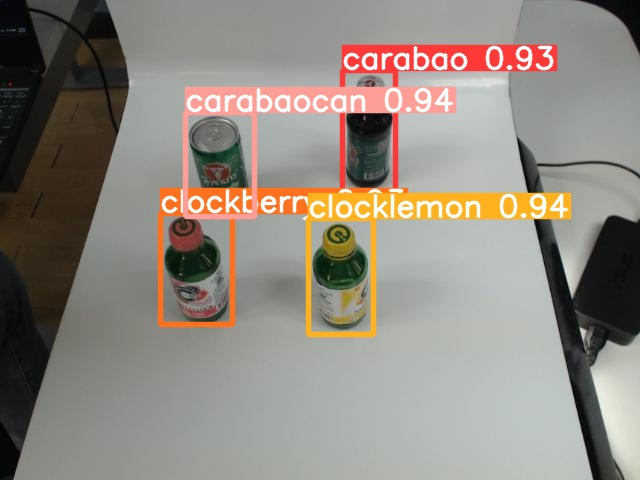



Image No.: 13


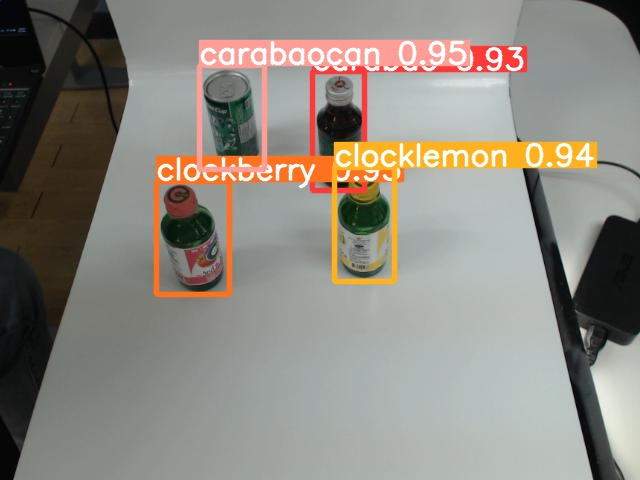



Image No.: 14


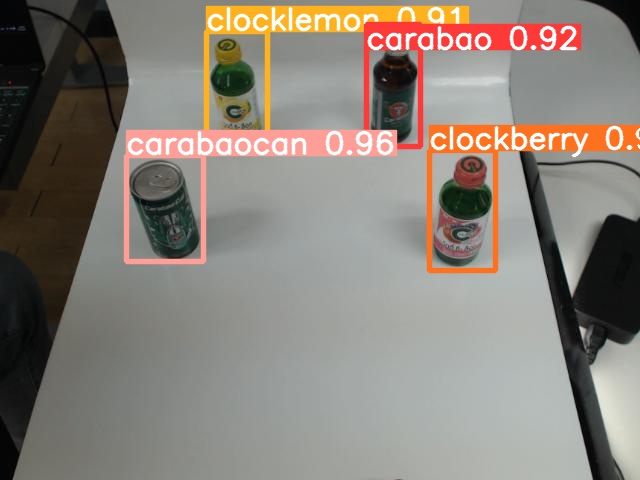



Image No.: 15


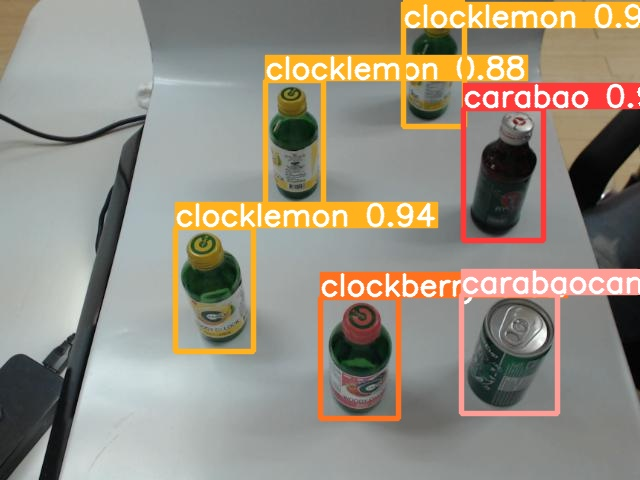



Image No.: 16


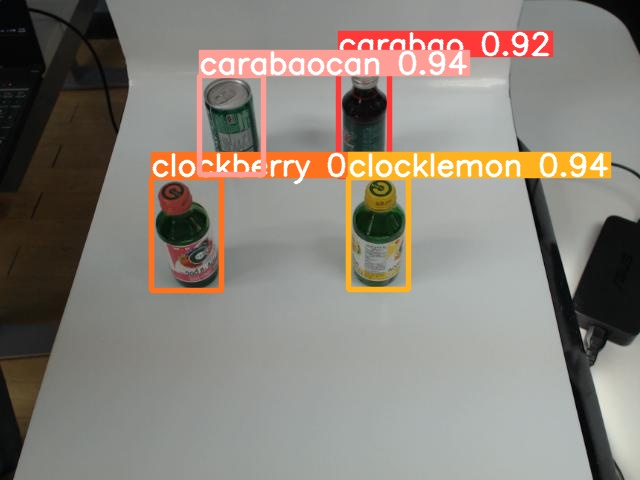



Image No.: 17


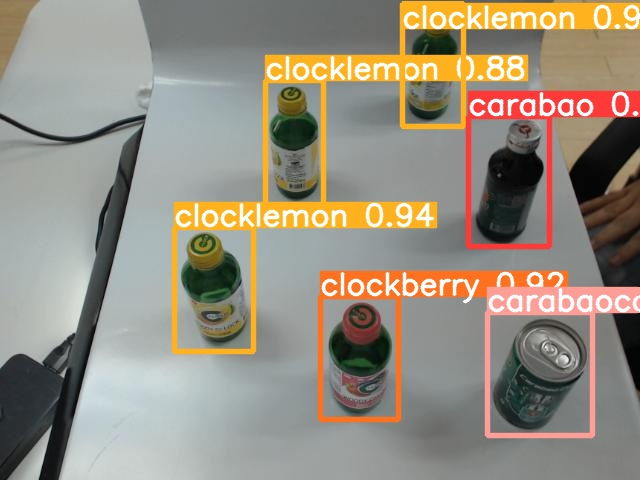



Image No.: 18


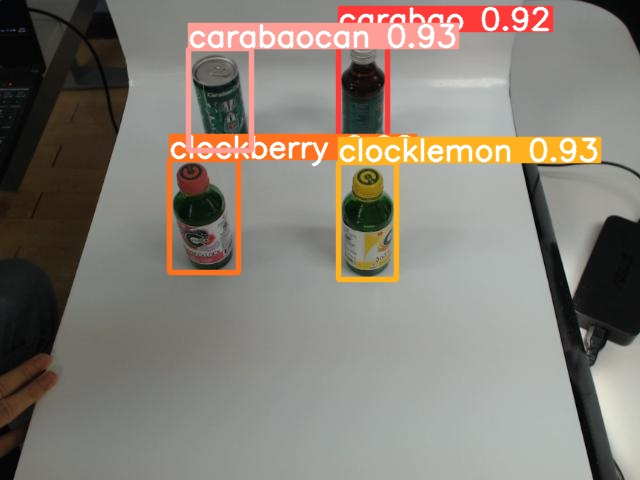



Image No.: 19


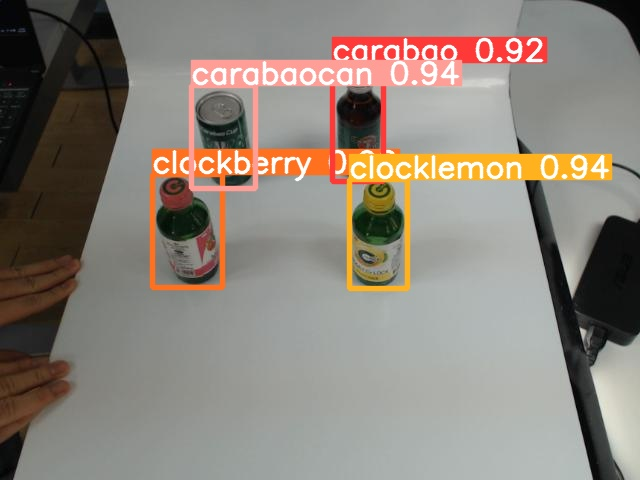



Image No.: 20


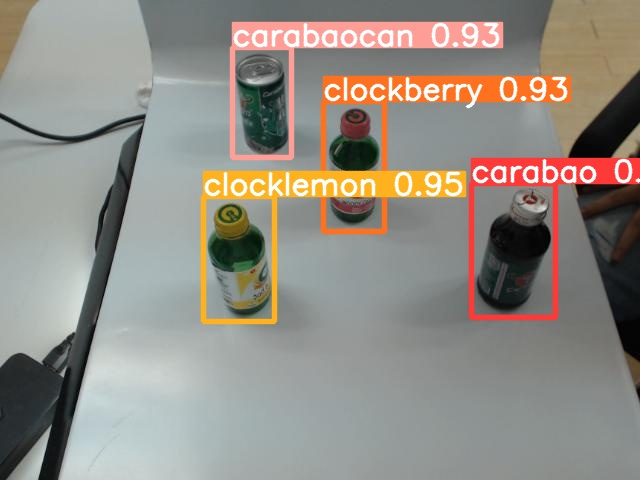



Image No.: 21


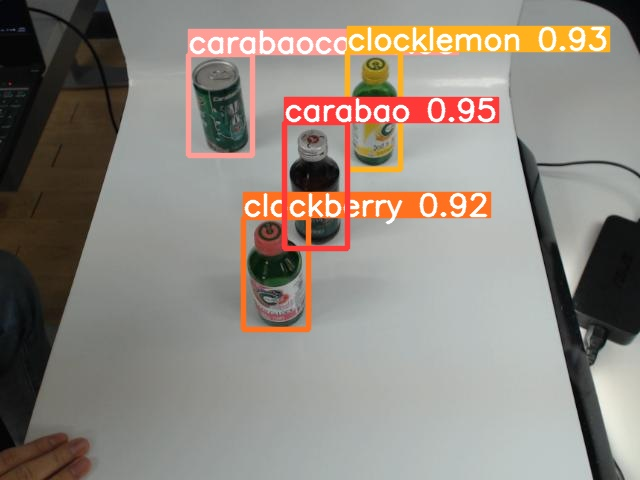



Image No.: 22


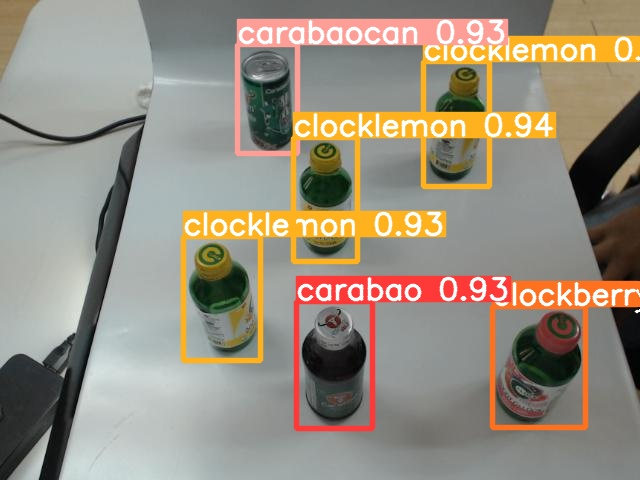



Image No.: 23


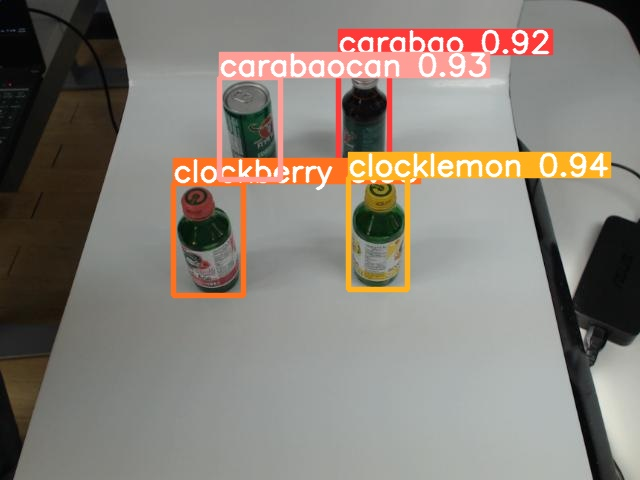



Image No.: 24


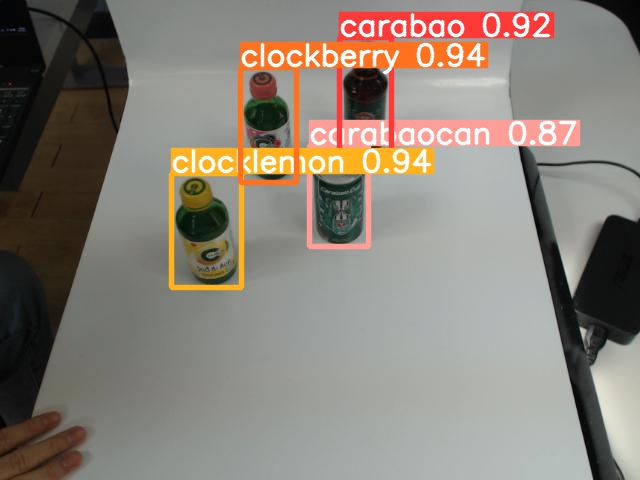



Image No.: 25


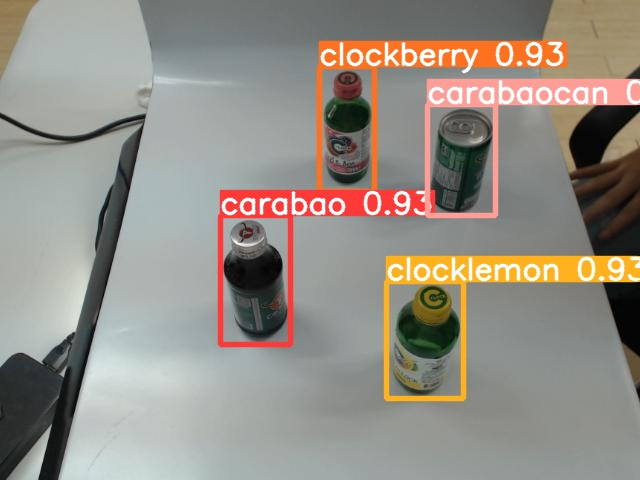



Image No.: 26


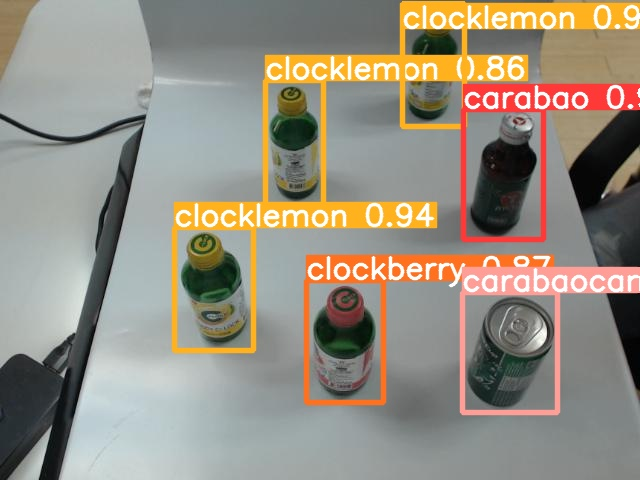



Image No.: 27


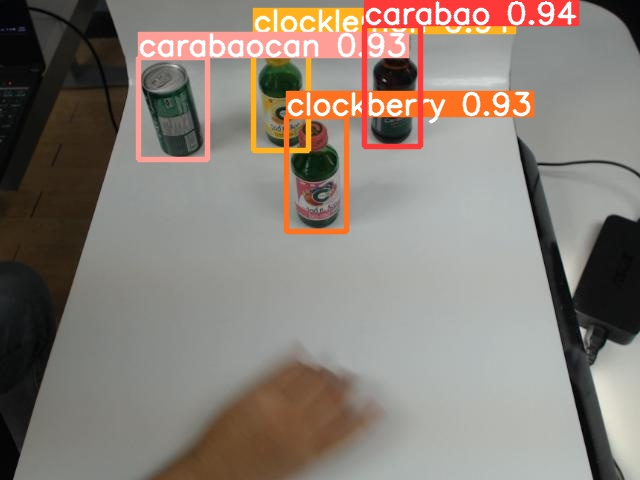



Image No.: 28


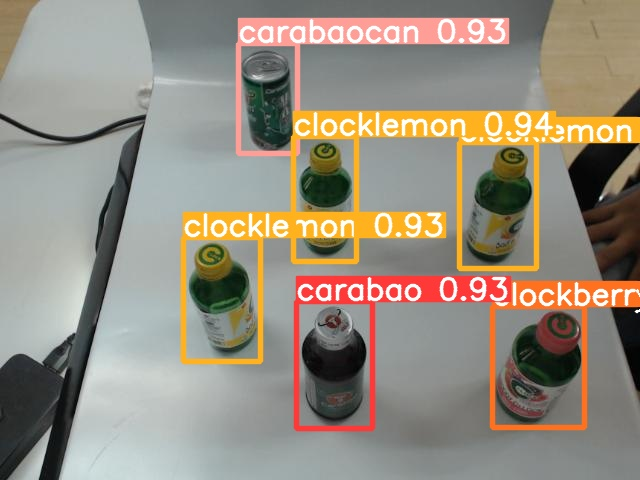



Image No.: 29


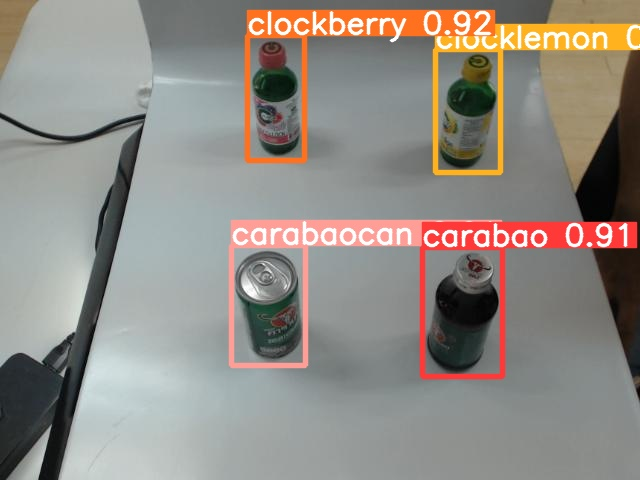

In [ ]:
i = 0
# Display the image from our prediction by limit to only 30 photos
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): # jpeg
  i += 1

  if i < 30:
    print(f"Image No.: {i}")
    display(Image(filename=imageName))
    print("\n")


# Save Model 💾

Save the best model's weights for further use

In [ ]:
# from google.colab import files
# files.download('./runs/train/exp/weights/best.pt')

# Summary

Transfer learning is anticipated to produce superior benefits to initial training. Nevertheless, the results of the scratch training are nearly optimal. Transfer learning does not significantly outperform the scratch model.

## F1 Curve

In [ ]:
x = Image('/content/yolov5/runs/train/training_scratch/F1_curve.png') 
y = Image('/content/yolov5/runs/train/transfer_learning/F1_curve.png')

plt.figure(figsize=(5,5))
print(f"F1 Curve of Scratch Model:")
display(x)
print("\nF1 Curve of Transfer Learning Model:")
display(y)

NameError: ignored

## Precision Curve

In [ ]:
x = Image('/content/yolov5/runs/train/training_scratch/P_curve.png') 
y = Image('/content/yolov5/runs/train/transfer_learning/P_curve.png')

print(f"Precision Curve of Scratch Model:")
display(x)
print("\nPrecision Curve of Transfer Learning Model:")
display(y)

## Conclusion
As the state of the art in computer vision is constantly improving, now is a terrific moment to work in the field.

YOLOv5's initial version is swift, efficient, and user-friendly. While YOLOv5 has not yet provided innovative model architecture enhancements to the YOLO model family, it does introduce a new PyTorch training and deployment strategy that enhances the state of the art for object detectors. Moreover, YOLOv5 is incredibly user-friendly and ready to use "out of the box" on custom objects.

Among the many advantages of YOLOv5, run speed is one of them. Compared to previous architectures, the YOLOv5 model runs about faster and detects tiny objects more effectively. Ultralytics has done an excellent job with their YOLO v5 open source model, which is simple to train and execute inference on.